# DATA

# CO CALIBRATION

In [361]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [362]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
#Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
#Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.sample(frac=1)

In [363]:
CO_Data=CO_Data.resample('5min').mean()
CO_Data=CO_Data.dropna()
CO_Data.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour
Date,,,,,,,,,
2019-10-02 11:55:00,3571.592599,26.378438,58.063437,312.70720,984.426875,10.0,2.0,2.0,11.0
2019-10-02 12:10:00,3541.294823,25.500000,48.612609,206.02900,984.224348,10.0,2.0,2.0,12.0
2019-10-02 12:15:00,2676.586421,25.765087,48.441408,170.30085,817.534721,10.0,2.0,2.0,12.0
2019-10-02 12:20:00,1694.726608,26.120078,47.716553,140.82115,509.284536,10.0,2.0,2.0,12.0
2019-10-02 12:25:00,3534.556213,25.502791,59.868837,397.72490,983.212857,10.0,2.0,2.0,12.0


In [364]:
#Ref=CO_Data['Ref'].to_list()
#CO_Data=CO_Data[CO_Data.Ref.between(np.mean(Ref)-0.7*np.std(Ref), np.mean(Ref)+0.7*np.std(Ref))]
#CO_Data.shape

In [365]:
subscript= str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

In [366]:
print(r'$O_{2}$')

$O_{2}$


In [367]:
import pandas as pd
import numpy as np
R1_data= pd.read_csv('R1_data.csv')
R1_data.columns=['Sen_2.5','Sen_10','Ref_2.5','Ref_10','Time','T','RH']
R1_data=R1_data.dropna()
Time=R1_data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
R1_data['Date'] = Date.tolist()
R1_data=R1_data.set_index('Date')
R1_data.drop('Time',axis = 1, inplace = True)
R1_data['Month']=R1_data.index.month
R1_data['Day_of_week']=R1_data.index.dayofweek
R1_data['Hour']=R1_data.index.hour
R1_data=R1_data.resample('5min').mean()
R1_data=R1_data.dropna()
R1_data.head()

,Sen_2.5,Sen_10,Ref_2.5,Ref_10,T,RH,Month,Day_of_week,Hour
Date,,,,,,,,,
2019-10-02 11:55:00,112.477418,112.477418,18.58330,32.75481,26.378438,58.063437,10.0,2.0,11.0
2019-10-02 12:10:00,14.218595,58.035547,17.30462,31.54500,25.497143,48.609524,10.0,2.0,12.0
2019-10-02 12:15:00,5.174785,22.242307,17.09769,31.13976,25.807733,48.275000,10.0,2.0,12.0
2019-10-02 12:20:00,4.945599,29.365024,17.06241,31.07447,26.123333,47.734643,10.0,2.0,12.0
2019-10-02 12:25:00,132.986920,133.789832,16.62954,30.29124,25.502791,59.868837,10.0,2.0,12.0


In [368]:
import pandas as pd
import numpy as np
N3_data= pd.read_csv('N3_data.csv')
N3_data.columns=['Sen_2.5','Sen_10','Ref_2.5','Ref_10','Time','T','RH']
N3_data=N3_data.dropna()
Time=N3_data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
N3_data['Date'] = Date.tolist()
N3_data=N3_data.set_index('Date')
N3_data.drop('Time',axis = 1, inplace = True)
N3_data['Month']=N3_data.index.month
N3_data['Day_of_week']=N3_data.index.dayofweek
N3_data['Hour']=N3_data.index.hour
N3_data=N3_data.resample('10min').mean()
N3_data=N3_data.dropna()
N3_data.head()

,Sen_2.5,Sen_10,Ref_2.5,Ref_10,T,RH,Month,Day_of_week,Hour
Date,,,,,,,,,
2019-10-02 12:00:00,7.972913,17.284141,17.700490,31.956415,24.827483,64.382667,10.0,2.0,12.0
2019-10-02 12:10:00,4.448633,10.763524,17.201155,31.342380,25.074930,54.874831,10.0,2.0,12.0
2019-10-02 12:20:00,3.378485,17.141379,17.062410,31.074470,25.445921,54.380000,10.0,2.0,12.0
2019-10-02 15:40:00,4.223667,13.522096,19.076640,35.864505,30.180843,55.684552,10.0,2.0,15.0
2019-10-02 15:50:00,4.301400,16.168827,19.210635,34.961880,30.316215,55.095438,10.0,2.0,15.0


# Outlier detection and removal

In [369]:
import numpy as np

import pandas as pd   
import seaborn as sns
from scipy import stats

((43258, 9), (45117, 9))

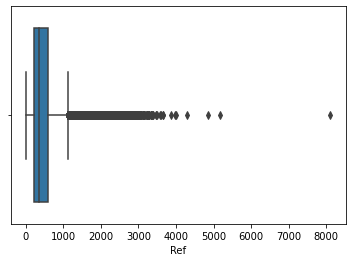

In [370]:
sns.boxplot(x=CO_Data['Ref'])
z=np.abs(stats.zscore(CO_Data))
CO_data=CO_Data[(z < 3).all(axis=1)]
CO_data.shape,CO_Data.shape

In [371]:
def MBE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    mbe=np.mean(true-pred)
    return mbe
def CRMSE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    crmse=np.sqrt(np.mean(((true-np.mean(true))-(pred-np.mean(pred)))**2))
    if np.std(pred)>np.std(true):
        crmse=crmse
    else:
        crmse=-crmse
    return crmse
import random

# Relative Expanded  Uncertainty(REU)

In [372]:
def REF(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    u=0.05*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/cal)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [373]:
def REF2(pred,y_test,alpha,LV):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    for i in range(len(ref)):
        if ref[i]==0:
            ref[i]=np.mean(ref)
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    for i in range(len(ref)):
        if ref[i]==0:
            ref[i]=ref_mean
    prec=np.array([20 for i in range(len(ref))])
    u=0.05*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
    P3=(Beta_0+(Beta_1-1)*LV)**2
    P=P1+P2+P3
    if P<0:
        P=random.randint(1,100)
    u_cal=(2*np.sqrt(P)/(Beta_0+Beta_1*LV))*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*0.1+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [374]:
def target(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    for i in range(len(ref)):
        if ref[i]==0:
            ref[i]=np.mean(ref)
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    #u=np.maximum(prec, 0.001*ref)
    u=0.001*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)
    P=[]
    for i in range(len(P2)):
        P.append(P1+P2[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,50)
    A=(2*(np.array(P))**0.5/ref)*100
    #for i in range(len(P3)):
        #if P3[i]<0:
            #P3[i]=random.randint(0,50)
    B=(2*(np.array(P3))/ref)*100
    bias=[]
    random=[]
    Ref=[]
    part1=(Beta_0/ref)*100
    part=[beta_1-1 for i in range(len(ref))]
    part2=(np.array(part))*100
    PART1=[]
    PART2=[]
    for i in range(len(A)):
        if A[i]<500:
            random.append(A[i])
            bias.append(B[i])
            Ref.append(ref[i])
            PART1.append(part1[i])
            PART2.append(part2[i])
    return [random,bias,Ref, PART1,PART2]

In [375]:
def target(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    for i in range(len(ref)):
        if ref[i]==0:
            ref[i]=np.mean(ref)
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    #u=np.maximum(prec, 0.001*ref)
    u=0.001*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)
    P=[]
    for i in range(len(P2)):
        P.append(P1+P2[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,50)
    A=(2*(np.array(P))**0.5/ref)*100
    #for i in range(len(P3)):
        #if P3[i]<0:
            #P3[i]=random.randint(0,50)
    B=(2*(np.array(P3))/ref)*100
    bias=[]
    random=[]
    Ref=[]
    part1=(Beta_0/ref)*100
    part=[beta_1-1 for i in range(len(ref))]
    part2=(np.array(part))*100
    PART1=[]
    PART2=[]
    for i in range(len(A)):
        if A[i]<500:
            random.append(A[i])
            bias.append(B[i])
            Ref.append(ref[i])
            PART1.append(part1[i])
            PART2.append(part2[i])
    return [random,bias,Ref, PART1,PART2]

In [376]:
def REF10(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    for i in range(len(ref)):
        if ref[i]==0:
            ref[i]=np.mean(ref)
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    u=np.maximum(prec,0.001*ref)
    u=0.001*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    #P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P2=-(u**2)
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    U1=[]
    Ref=[]
    for i in range(len(P)):
        if P[i]>=0:
            U1.append(P[i])
            Ref.append(ref[i])
    #for i in range(len(P)):
        #if P[i]<0:
           # P[i]=np.mean(P1)
    u_cal_s=np.array(U1)
    return u_cal_s,Ref

In [377]:
from sklearn import linear_model
import numpy as np
Y=[20,40,60,80,100]
X=np.array([10,30,50,70,90]).reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 10.0
Coefficients: 
 [1.]


In [378]:
def target2(Y,X,u):
    from sklearn import linear_model
    import numpy as np
    x=np.array(Y).reshape(-1, 1)
    y=np.array(X).reshape(-1, 1)
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    b0=regr.intercept_
    b1=regr.coef_[0]
    RSS=sum((np.array(Y)-(b0[0]+b1[0]*np.array(X)))**2)
    RR=2*((RSS/((len(X)-2))-u**2)/np.array(X))**0.5
    RB=2*(b0/np.array(X)+(b1-1))
    return RR,RB

A=[200,360,288,290]
B=[204,336,267,301]
y=np.array(B).reshape(-1, 1)
RSS=sum((np.array(A)-(b0[0]+b1[0]*np.array(B)))**2)
RSS
RR=2*((RSS/((len(X)-2))-5**2)/np.array(X))**0.5
RR

x=np.array(A).reshape(-1, 1)
y=np.array(B).reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
b0=regr.intercept_
b1=regr.coef_[0]
b0[0]
b1[0]

target2(A,B,5)

B=np.array([20,20])
A=np.array([1,30])
C=np.array([A,B])
np.maximum(A,B)

In [379]:
Ref=CO_Data['Ref'].to_list()
#CO_Data=CO_Data[CO_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#NO2_Data.shape

## Model 1: Linear Regression

In [380]:
df1=[x for _, x in CO_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]

data_Oct=data_oct.resample('15min').mean()
data_Oct=data_Oct.dropna()
data_Oct1=data_Oct[:int(0.8*data_Oct.shape[0])]
data_Oct2=data_Oct[int(0.8*data_Oct.shape[0]):]
data_Nov=data_nov.resample('15min').mean()
data_Nov=data_Nov.dropna()
data_Nov1=data_Nov[:int(0.8*data_Nov.shape[0])]
data_Nov2=data_Nov[int(0.8*data_Nov.shape[0]):]
data_Dec=data_dec.resample('15min').mean()
data_Dec=data_Dec.dropna()
data_Dec1=data_Dec[:int(0.8*data_Dec.shape[0])]
data_Dec2=data_Dec[int(0.8*data_Dec.shape[0]):]
data_Jan=data_jan.resample('15min').mean()
data_Jan=data_Jan.dropna()
data_Jan1=data_Jan[:int(0.8*data_Jan.shape[0])]
data_Jan2=data_Jan[int(0.8*data_Jan.shape[0]):]
data_Feb=data_feb.resample('15min').mean()
data_Feb=data_Feb.dropna()
data_Feb1=data_Feb[:int(0.8*data_Feb.shape[0])]
data_Feb2=data_Feb[int(0.8*data_Feb.shape[0]):]
data_Mar=data_mar.resample('15min').mean()
data_Mar=data_Mar.dropna()
data_Mar1=data_Mar[:int(0.8*data_Mar.shape[0])]
data_Mar2=data_Mar[int(0.8*data_Mar.shape[0]):]
frame1=[data_Oct1,data_Nov1,data_Dec1,data_Jan1,data_Feb1,data_Mar1]
frame2=[data_Oct2,data_Nov2,data_Dec2,data_Jan2,data_Feb2,data_Mar2]
CO_data1=pd.concat(frame1)
CO_data2=pd.concat(frame2)
CO_data=pd.concat([CO_data1,CO_data2])

In [381]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt

X=CO_data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_data['Ref']
#X=R1_data[['Sen_2.5','T','RH','Month','Day_of_week','Hour']]
#y=R1_data['Ref_2.5']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2,shuffle=True)
#train_test_split(X, y, test_size = 0.2)

In [382]:
X1=X[:int(0.4*(X.shape[0]))]
X2=X[int(0.6*(X.shape[0])):]
X_train=X[int(0.2*(X.shape[0])):]
X_test=X[:int(0.2*(X.shape[0]))]



y_train=y[int(0.2*(X.shape[0])):]
y_test=y[:int(0.2*(X.shape[0]))]

X1=X[:int(0.4*(X.shape[0]))]
X2=X[int(0.6*(X.shape[0])):]
X_train=pd.concat([X1,X2])
X_test=X[int(0.4*(X.shape[0])):int(0.6*(X.shape[0]))]


y1=y[:int(0.4*(X.shape[0]))]
y2=y[int(0.6*(X.shape[0])):]
y_train=pd.concat([y1,y2])
y_test=y[int(0.4*(X.shape[0])):int(0.6*(X.shape[0]))]

In [383]:
lr = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
  
# fit the regressor with x and y data
regressor=regressor.fit(X_train, y_train) 
pred = regressor.predict(X_test)
u_c_s=REF10(pred,y_test,1)[0]
X=np.array(REF10(pred,y_test,1)[1])**2
X=X.reshape((-1, 1))
model = lr.fit(X,u_c_s )
m_CO=model.coef_
q_CO=model.intercept_
m_CO,q_CO

LV=10000
u_r=(np.sqrt(m_CO*y_test**2+q_CO)/y_test)*100
u_LV=(np.sqrt(m_CO*LV**2+q_CO)/LV)*100
T_LV=25
Beta=T_LV/u_LV
#Beta=T_LV-u_LV
LQ,median, UQ=np.percentile(y_test, [25,50,75])
u_25=(np.sqrt(m_CO*LQ**2+q_CO)/LQ)*100
T_25=u_25*Beta
u_50=(np.sqrt(m_CO*median**2+q_CO)/median)*100
T_50=u_50*Beta
u_75=(np.sqrt(m_CO*UQ**2+q_CO)/UQ)*100
T_75=u_75*Beta
T_25,T_50,T_75

(array([260.17584684]), array([185.2348942]), array([105.65607129]))

In [384]:
lr = LinearRegression()
model = lr.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = model.predict(X_test.drop(['Lab1'], axis=1))
lab1=X_test['Lab1'].to_list()

index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_CO=sMAPE_lr
RMSE_lr_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_lr_CO=Pearson_lr
sMAPE_lab_CO=sMAPE_lab
RMSE_lab_CO=round(RMSE_lab/np.mean(np.array(lab1)),2)
Pearson_lab_CO=Pearson_lab
R2_lr_CO=round(sm.r2_score(y_test, pred), 2)
R2_lab_CO=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_CO=RMSE_lr
RMSE_Lab_CO=RMSE_lab

A=len(y_test)-200
D=max(y_test[A:])-0.2*max(y_test[A:])
C=max(y_test[A:])-0.1*max(y_test[A:])
B=120
Pearson_lr,RMSE_Lr_CO

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.92, 189.0)

In [385]:
cal=np.array(pred)
ref=np.array(y_test.to_list())
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
    #cal=np.log(cal)
    #ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+1)*(0.08*ref)**2)
du_s=RSS/(len(cal)-2)
Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P1

29157.53112696561

In [386]:
import random
alpha=1.4
LV2=max(y_test)+400
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV2:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV2)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV2)**2
P3=(Beta_0+(Beta_1-1)*LV2)
P=P1+P2+P3
Bias=(2*(P3)/LV2)*100
Random=(2*(P1+P2)**0.5/LV2)*100


import random
alpha=1.4
LV=median
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=LQ
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

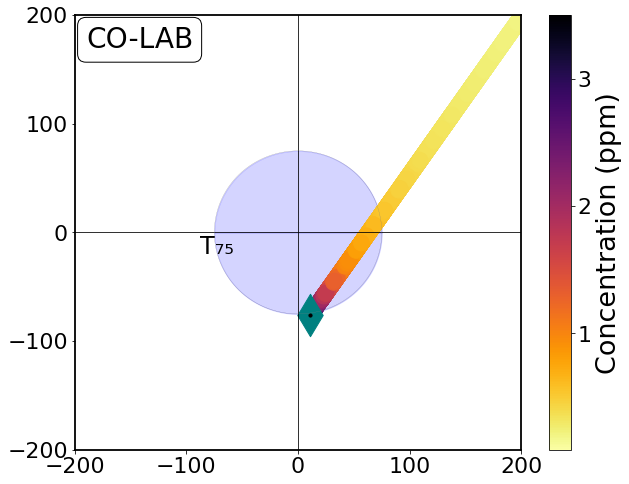

In [387]:
A4=target(lab1,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

#plt.fill_between(a1, b1, color='blue', alpha=0.17)
#plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

#plt.plot(x1,y1, linewidth=0.2, color='grey')
#plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
#plt.plot(x2,y2, linewidth=0.2, color='grey')
#plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

#plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
#plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
#plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
#plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-200)
plt.xticks(np.arange(-75,75),fontsize=22)
plt.xticks([-200,-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-200,-100,0,100,200],fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,1,2,3])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=27)
plt.scatter(Random,Bias+0.2,marker="d",s=900, color='teal')
textstr = 'CO-LAB'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-25,-7, 'T25'.translate(subscript),fontsize=18)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=18)
plt.text(-88,-20, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_CO_LAB.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [388]:
import random
alpha=1.4
LV=max(y_test)+400
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=median
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=LQ
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

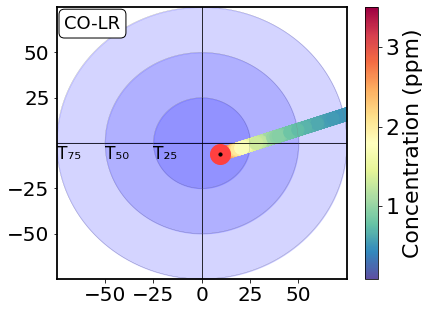

In [389]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(6.5,5))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=600,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=20)
plt.xticks([-50,-25,0,25,50],fontsize=20)

plt.yticks(np.arange(-75,75),fontsize=20)
plt.yticks([-50,-25,25,50],fontsize=20)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,1,2,3])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)
plt.scatter(Random,Bias+0.2,marker="o",s=400, color='#FF4040')
textstr = 'CO-LR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.027, 0.972, textstr, transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
plt.text(-25,-9, 'T25'.translate(subscript),fontsize=17)
plt.text(-50,-9, 'T50'.translate(subscript),fontsize=17)
plt.text(-75,-9, 'T75'.translate(subscript),fontsize=17)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_CO_LR.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

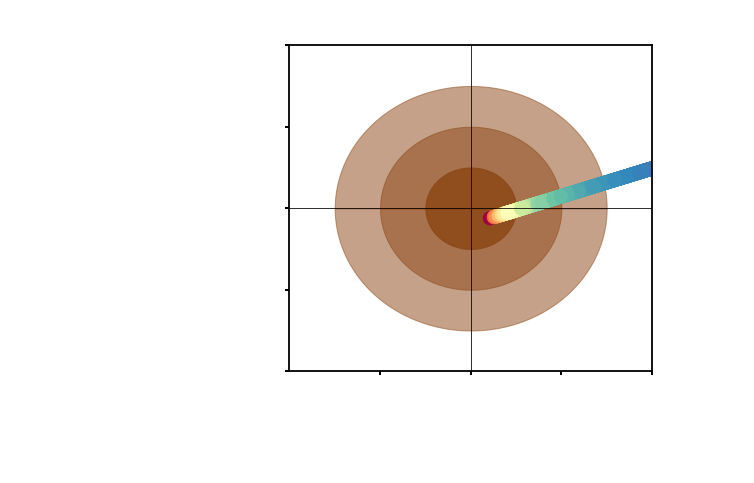

In [390]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=25
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 25, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_CO_LR1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,201)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.2)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='#513e00',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
#plt.text(B-20, C, r'$R^{2}(LR)=$'+str(R2_lr_CO), fontsize = 14, color='#513e00')
#plt.text(B-20, D, r'$R^{2}(Lab)=$' +str(R2_lab_CO), fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [391]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_lr=pred
MBE_LR_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_CO=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_CO=MBE(lab1,y_test)/np.std(y_test)
CRMSE_LAB_CO=CRMSE(y_test,lab1)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 103.97
Mean squared error(MSE) = 35721.44
Median absolute error = 68.85
Explain variance score = 0.83
R2 score = 0.82


## Model 2 :  Support Vector Regression (SVR)

In [392]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'linear')
regressor.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
for i in range(len(Pred)):
    if pred[i]<0:
        pred[i]=np.mean(np.array(pred))
pred_svr=pred

In [393]:
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)

Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_CO=sMAPE_lr
RMSE_svr_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_svr_CO=Pearson_lr
R2_svr_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_CO=RMSE_lr

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='brown',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
#plt.text(B-20, C,r'$R^{2}(SVR)=$'+str(R2_svr_CO) , fontsize = 14, color='brown')
#plt.text(B-20, D,r'$R^{2}(Lab)=$'+str(R2_lab_CO) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [394]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_svr=pred
MBE_SVR_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 100.9
Mean squared error(MSE) = 34408.42
Median absolute error = 66.0
Explain variance score = 0.84
R2 score = 0.83


In [395]:
import random
alpha=1.4
LV=max(y_test)+400
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=median
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=LQ
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

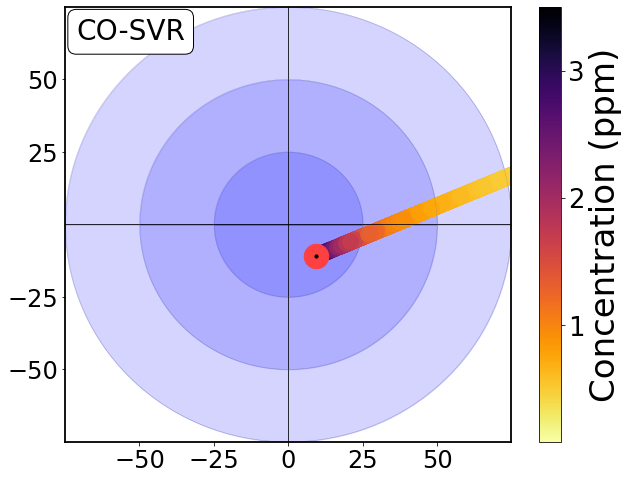

In [396]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' 
#in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=24)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=24)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,1,2,3])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = 'CO-SVR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-25,-7, 'T25'.translate(subscript),fontsize=24)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
#plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_CO_SVR.pdf", format="pdf", bbox_inches="tight")
plt.show()

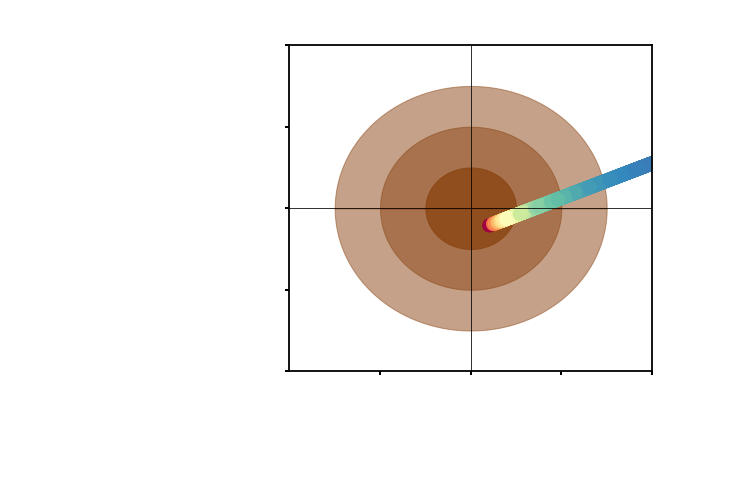

In [397]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=25
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 25, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_CO_SVR1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()


## Model 3 : Random Forest

In [398]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor =RandomForestRegressor(max_features=0.5687641759232935, max_leaf_nodes=1450,
                      n_estimators=313, n_jobs=-1)
  
  
# fit the regressor with x and y data
regressor=regressor.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))

In [399]:
features_CO=regressor.feature_importances_
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
pred_rf_co=pred
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_CO=sMAPE_lr
RMSE_rf_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_rf_CO=Pearson_lr
R2_rf_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_CO=RMSE_lr

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


In [400]:
import random
alpha=1.4
LV=max(y_test)+400
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100


import random
alpha=1.4
LV=median
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=LQ
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

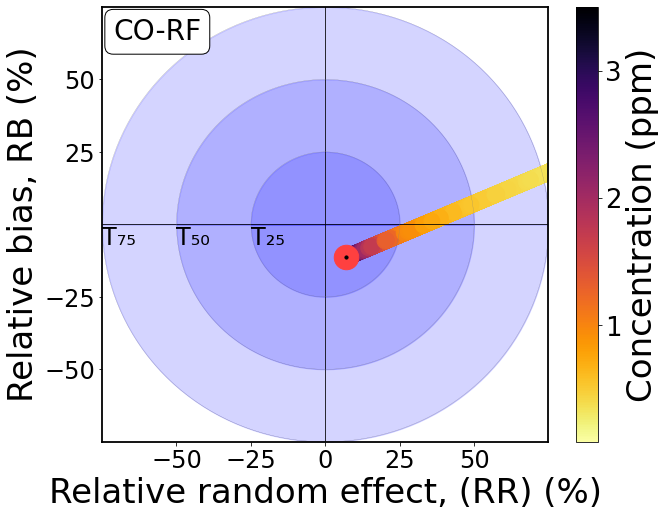

In [401]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

plt.xlabel('Relative random effect, (RR) (%)' ,fontsize=34)
plt.ylabel('Relative bias, RB (%)',fontsize=34)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=24)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=24)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,1,2,3])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = 'CO-RF'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
plt.text(-25,-7, 'T25'.translate(subscript),fontsize=24)
plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_CO_RF.pdf", format="pdf", bbox_inches="tight")
plt.show()

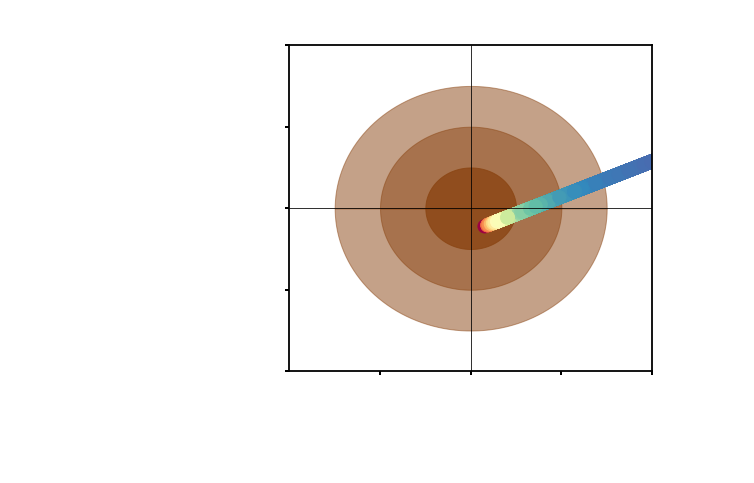

In [402]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=25
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 25, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')
#plt.title('Case3')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_CO_RF1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

X_Train, X_Test, y_Train, y_Test =train_test_split(X, y, test_size = 0.001)
REU_CO=[]
for i in range(1,30):
    regressor=regressor.fit(X_train[:120*i].drop(['Lab1'], axis=1), y_train[:120*i])
    pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
    reu=REF2(pred,y_test,1.35,30000)
    REU_CO.append(reu) 

## Model 5: ANN

In [403]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(3, input_shape = (6,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_39 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_40 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_41 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 101       
Total params: 30,046
Trainable params: 30,046
Non-trainable params: 0
_________________________________________________________________


In [404]:
scaler = StandardScaler()
scaler.fit(X_train.drop(['Lab1'], axis=1))
X_train_scaled=scaler.transform(X_train.drop(['Lab1'], axis=1))
X_test_scaled=scaler.transform(X_test.drop(['Lab1'], axis=1))
hist=model.fit(X_train_scaled, y_train, batch_size= 10, epochs=40, verbose= 0)#,validation_split=0.2

In [405]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_CO=sMAPE_lr
RMSE_ann_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_ann_CO=Pearson_lr
R2_ann_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_CO=RMSE_lr

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='tomato',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
#plt.text(B-200, C, r'$R^{2}(ANN)=$'+str(R2_ann_CO), fontsize = 14, color='tomato')
#plt.text(B-200, D, r'$R^{2}(Lab)=$'+str(R2_lab_CO), fontsize = 14, color='#426eff')
#plt.text(B-800, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-800, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('ANN Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [406]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_ann=pred
MBE_ANN_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 101.03
Mean squared error(MSE) = 32623.1
Median absolute error = 71.28
Explain variance score = 0.84
R2 score = 0.84


fig= plt.figure(figsize=(50,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],lab1[A:], color='#426eff',linewidth=3)
plt.plot(index[A:],pred_lr[A:], color='goldenrod',linewidth=3)
plt.plot(index[A:],pred_svr[A:], color='brown',linewidth=3)
plt.plot(index[A:],pred_rf[A:], color='indigo',linewidth=3)
plt.plot(index[A:],pred_ann[A:], color='tomato',linewidth=3)

plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.ylabel('CO Concentration(ppb)',fontsize=18)
plt.legend(['Ref', 'LAB', 'LR','SVR','RF','ANN'], loc = 2, bbox_to_anchor = (0.95,1))
#plt.title('CO Sensor',fontsize=18 )
plt.grid(linestyle='-.',linewidth=0.3)

In [407]:
REF2(pred,y_test,1,30000)

43.28375711695745

In [408]:
import random
alpha=1.4
LV=max(y_test)+400
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=median
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=LQ
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

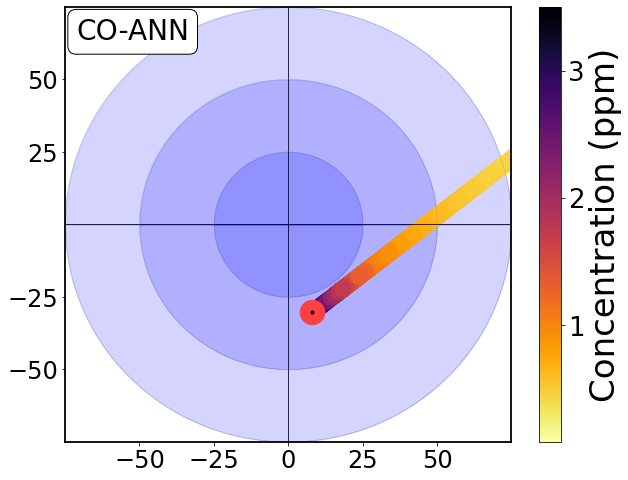

In [409]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=24)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=24)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,1,2,3])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = 'CO-ANN'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-25,-7, 'T25'.translate(subscript),fontsize=24)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
#plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_CO_ANN.pdf", format="pdf", bbox_inches="tight")
plt.show()

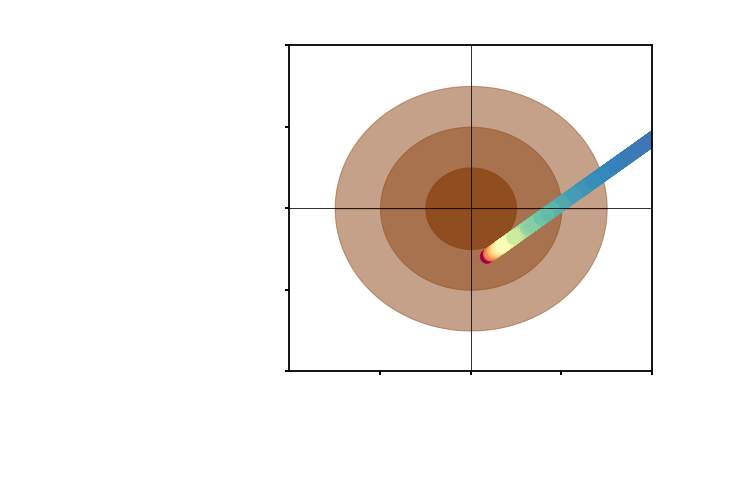

In [410]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=25
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 25, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_CO_ANN1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

# Model 6: XGBoost

In [411]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model =XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.5325799047395141, colsample_bynode=1,
             colsample_bytree=1.0, gamma=0, gpu_id=-1, grow_policy='lossguide',
             importance_type='gain', interaction_constraints='',
             learning_rate=0.09162995757195729, max_delta_step=0, max_depth=0,
             max_leaves=10, min_child_weight=1.4762838570024215,
                     monotone_constraints='()', n_estimators=970, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.09065596443403534,
             reg_lambda=0.0009765625, scale_pos_weight=1,
             subsample=0.7601526809022708, tree_method='hist',
             use_label_encoder=False, validate_parameters=1, verbosity=0)
model.fit(X_train.drop(['Lab1'], axis=1), y_train)

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.5325799047395141, colsample_bynode=1,
             colsample_bytree=1.0, gamma=0, gpu_id=-1, grow_policy='lossguide',
             importance_type='gain', interaction_constraints='',
             learning_rate=0.09162995757195729, max_delta_step=0, max_depth=0,
             max_leaves=10, min_child_weight=1.4762838570024215, missing=nan,
             monotone_constraints='()', n_estimators=970, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.09065596443403534,
             reg_lambda=0.0009765625, scale_pos_weight=1,
             subsample=0.7601526809022708, tree_method='hist',
             use_label_encoder=False, validate_parameters=1, verbosity=0)

In [412]:
pred = model.predict(X_test.drop(['Lab1'], axis=1))
pred_xgb_co=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_CO=sMAPE_lr
RMSE_xgb_CO=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_CO=Pearson_lr
R2_xgb_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_CO=RMSE_lr

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


In [413]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_xgb=pred
MBE_XGB_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 87.93
Mean squared error(MSE) = 24902.85
Median absolute error = 54.51
Explain variance score = 0.88
R2 score = 0.88


In [414]:
import random
alpha=1.4
LV=max(y_test)+400
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=median
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=LQ
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

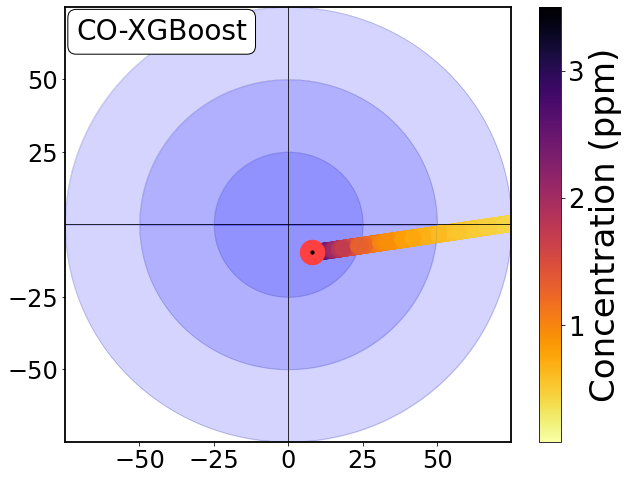

In [415]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=24)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=24)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,1,2,3])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = 'CO-XGBoost'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-25,-7, 'T25'.translate(subscript),fontsize=24)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
#plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_CO_XGB.pdf", format="pdf", bbox_inches="tight")
plt.show()

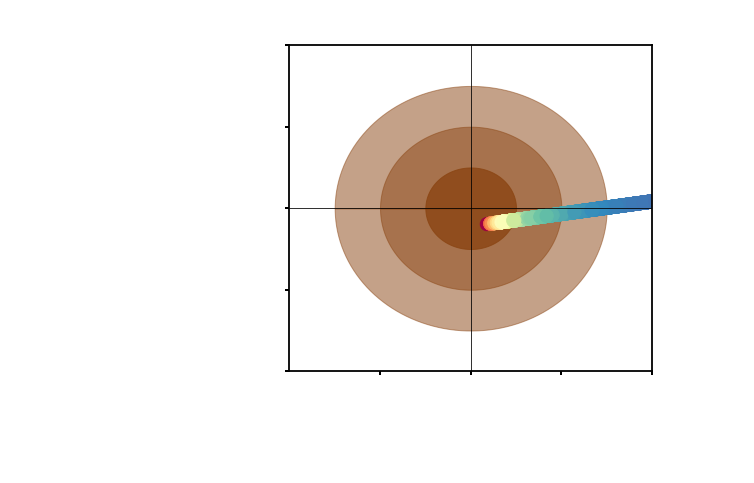

In [416]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=25
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 25, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_CO_XGB1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

# NO2 Calibration

In [417]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('5min').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [418]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('5min').mean()
NO2_Data=NO2_Data.dropna()
NO2_Data.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour,Ref_O3
Date,,,,,,,,,,
2019-10-02 11:55:00,460.448301,26.378438,58.063437,15.230400,7.850000,10.0,2.0,2.0,11.0,46.094860
2019-10-02 12:10:00,1364.583446,25.500000,48.612609,6.665136,37.815652,10.0,2.0,2.0,12.0,55.810810
2019-10-02 12:15:00,224.159154,25.765087,48.441408,6.642805,12.275893,10.0,2.0,2.0,12.0,57.907075
2019-10-02 12:20:00,82.998996,26.120078,47.716553,2.844210,13.152720,10.0,2.0,2.0,12.0,58.880540
2019-10-02 15:45:00,566.301152,30.418466,50.153181,10.084125,9.323533,10.0,2.0,2.0,15.0,40.068225


In [419]:
#Ref=NO2_Data['Ref'].to_list()
#NO2_Data=NO2_Data[NO2_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#NO2_Data.shape

## Model 1: Linear Regression (LR)

In [420]:
df1=[x for _, x in NO2_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]

data_Oct=data_oct.resample('15min').mean()
data_Oct=data_Oct.dropna()
data_Oct1=data_Oct[:int(0.8*data_Oct.shape[0])]
data_Oct2=data_Oct[int(0.8*data_Oct.shape[0]):]
data_Nov=data_nov.resample('15min').mean()
data_Nov=data_Nov.dropna()
data_Nov1=data_Nov[:int(0.8*data_Nov.shape[0])]
data_Nov2=data_Nov[int(0.8*data_Nov.shape[0]):]
data_Dec=data_dec.resample('15min').mean()
data_Dec=data_Dec.dropna()
data_Dec1=data_Dec[:int(0.8*data_Dec.shape[0])]
data_Dec2=data_Dec[int(0.8*data_Dec.shape[0]):]
data_Jan=data_jan.resample('15min').mean()
data_Jan=data_Jan.dropna()
data_Jan1=data_Jan[:int(0.8*data_Jan.shape[0])]
data_Jan2=data_Jan[int(0.8*data_Jan.shape[0]):]
data_Feb=data_feb.resample('15min').mean()
data_Feb=data_Feb.dropna()
data_Feb1=data_Feb[:int(0.8*data_Feb.shape[0])]
data_Feb2=data_Feb[int(0.8*data_Feb.shape[0]):]
data_Mar=data_mar.resample('15min').mean()
data_Mar=data_Mar.dropna()
data_Mar1=data_Mar[:int(0.8*data_Mar.shape[0])]
data_Mar2=data_Mar[int(0.8*data_Mar.shape[0]):]
frame1=[data_Oct1,data_Nov1,data_Dec1,data_Jan1,data_Feb1,data_Mar1]
frame2=[data_Oct2,data_Nov2,data_Dec2,data_Jan2,data_Feb2,data_Mar2]
NO2_data1=pd.concat(frame1)
NO2_data2=pd.concat(frame2)
NO2_data=pd.concat([NO2_data1,NO2_data2])

In [421]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#X=R1_data[['Sen_10','T','RH','Month','Day_of_week','Hour']]
#y=R1_data['Ref_10']
X=NO2_data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle=False)
len(X_test)

2608

In [422]:
lr = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
  
# fit the regressor with x and y data
regressor=regressor.fit(X_train, y_train) 
pred = regressor.predict(X_test)
u_c_s=REF10(pred,y_test,1)[0]
X=np.array(REF10(pred,y_test,1)[1])**2
X=X.reshape((-1, 1))
model = lr.fit(X,u_c_s )
m_CO=model.coef_
q_CO=model.intercept_
m_CO,q_CO

LV=200
u_r=(np.sqrt(m_CO*y_test**2+q_CO)/y_test)*100
u_LV=(np.sqrt(m_CO*LV**2+q_CO)/LV)*100
T_LV=25
Beta=T_LV/u_LV
#Beta=T_LV-u_LV
LQ,median, UQ=np.percentile(y_test, [25,50,75])
u_25=(np.sqrt(m_CO*LQ**2+q_CO)/LQ)*100
T_25=u_25*Beta
u_50=(np.sqrt(m_CO*median**2+q_CO)/median)*100
T_50=u_50*Beta
u_75=(np.sqrt(m_CO*UQ**2+q_CO)/UQ)*100
T_75=u_75*Beta
T_25,T_50,T_75

<ipython-input-422-18bf9c5d0518>:21: RuntimeWarning: invalid value encountered in sqrt
  u_LV=(np.sqrt(m_CO*LV**2+q_CO)/LV)*100


(array([nan]), array([nan]), array([nan]))

In [423]:
lr = LinearRegression()
model = lr.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = model.predict(X_test.drop(['Lab1'], axis=1))
lab1=X_test['Lab1'].to_list()
for i in range(len(lab1)):
    if lab1[i]>100:
        lab1[i]=np.mean(lab1)
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_NO2=sMAPE_lr
RMSE_lr_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_lr_NO2=Pearson_lr
sMAPE_lab_NO2=sMAPE_lab
RMSE_lab_NO2=round(RMSE_lab/np.mean(np.array(lab1)),2)
Pearson_lab_NO2=Pearson_lab
R2_lr_NO2=round(sm.r2_score(y_test, pred), 2)
R2_lab_NO2=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_NO2=RMSE_lr
RMSE_Lab_NO2=RMSE_lab

A=len(y_test)-200
B=120
D=max(y_test[A:])-0.15*max(y_test[A:])
C=max(y_test[A:])-0.05*max(y_test[A:])
Pearson_lr_NO2,R2_lr_NO2,RMSE_Lr_NO2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.9, 0.81, 5.0)

subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,201)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='#513e00',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-150, C,r'$R^{2}(LR)=$'+str(R2_lr_NO2) , fontsize = 14, color='#513e00')
#plt.text(B-150, D,r'$R^{2}(Lab)=$'+str(R2_lab_NO2) , fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [424]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_LR_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_NO2=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_NO2=MBE(lab1,y_test)/(2.6*np.std(y_test))
CRMSE_LAB_NO2=CRMSE(y_test,lab1)/(2.6*np.std(y_test))
pred_lr=pred

Regressor model performance:
Mean absolute error(MAE) = 3.88
Mean squared error(MSE) = 24.9
Median absolute error = 3.25
Explain variance score = 0.82
R2 score = 0.81


In [425]:
import random
alpha=1.4
LV=max(y_test)+2
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=median
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=LQ
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

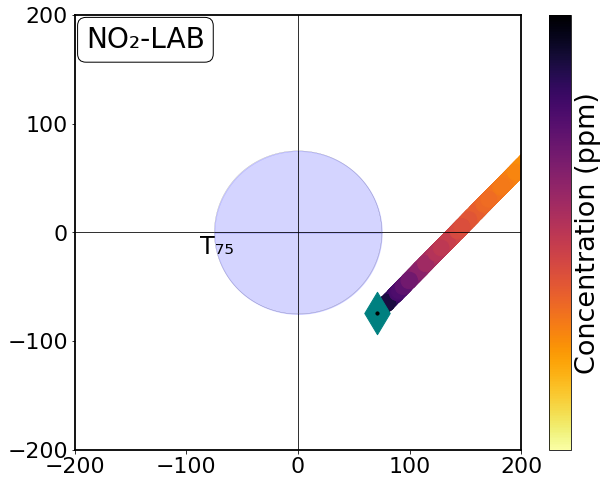

In [426]:
A4=target(lab1,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

#plt.fill_between(a1, b1, color='blue', alpha=0.17)
#plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

#plt.plot(x1,y1, linewidth=0.2, color='grey')
#plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
#plt.plot(x2,y2, linewidth=0.2, color='grey')
#plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

#plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
#plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
#plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
#plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-200)
plt.xticks(np.arange(-75,75),fontsize=22)
plt.xticks([-200,-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-200,-100,0,100,200],fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,1,2,3])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=27)
plt.scatter(Random,Bias+0.2,marker="d",s=900, color='teal')
textstr = 'NO2-LAB'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-25,-7, 'T25'.translate(subscript),fontsize=18)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=18)
plt.text(-88,-20, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_NO2_LAB.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [427]:
import random
alpha=1.4
LV=max(y_test)+5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=median
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=LQ
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

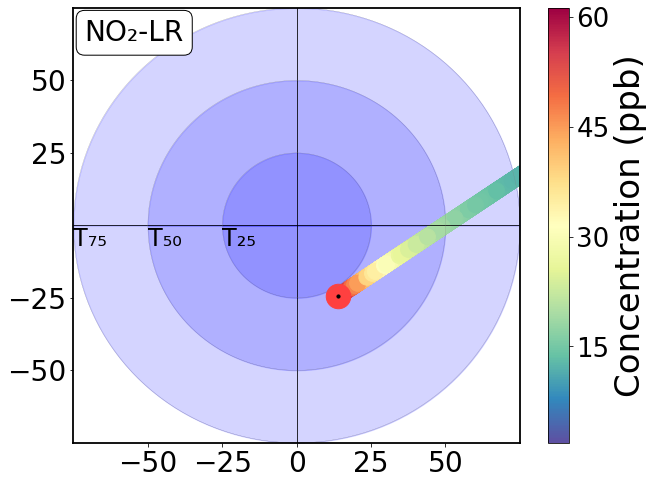

In [428]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=28)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=28)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,15,30,45,60,75])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = textstr = 'NO2-LR'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
plt.text(-25,-7, 'T25'.translate(subscript),fontsize=24)
plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_NO2_LR.pdf", format="pdf", bbox_inches="tight")
plt.show()

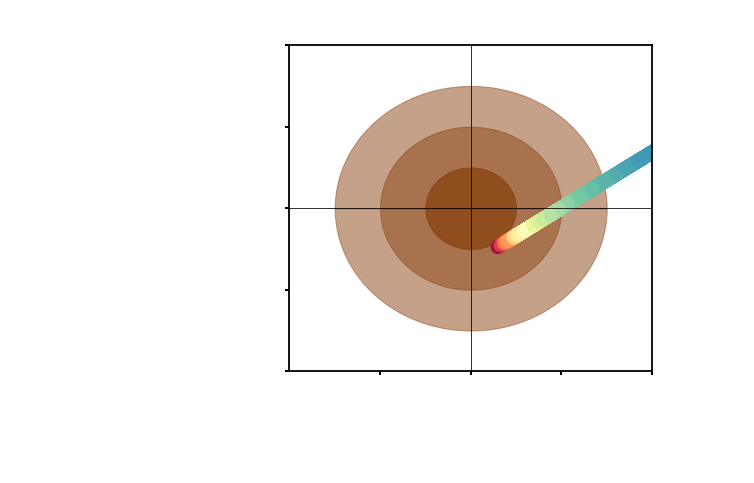

In [429]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=25
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 25, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_NO2_LR1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

## Model 2: Support Vector Regression (SVR)

In [430]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'poly')
regressor.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
for i in range(len(Pred)):
    if pred[i]<0:
        pred[i]=np.mean(np.array(pred))

In [431]:
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_NO2=sMAPE_lr
RMSE_svr_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_svr_NO2=Pearson_lr
R2_svr_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_NO2=RMSE_lr
Pearson_svr_NO2,R2_svr_NO2,RMSE_Svr_NO2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.92, 0.85, 4.5)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='brown',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-150, C, r'$R^{2}(SVR)=$'+str(R2_svr_NO2), fontsize = 14, color='brown')
#plt.text(B-150, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [432]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_NO2=CRMSE(y_test,pred)/np.std(y_test)
pred_svr=pred

Regressor model performance:
Mean absolute error(MAE) = 3.39
Mean squared error(MSE) = 20.2
Median absolute error = 2.69
Explain variance score = 0.85
R2 score = 0.85


In [433]:
import random
alpha=1.4
LV=max(y_test)+5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=median
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=LQ
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

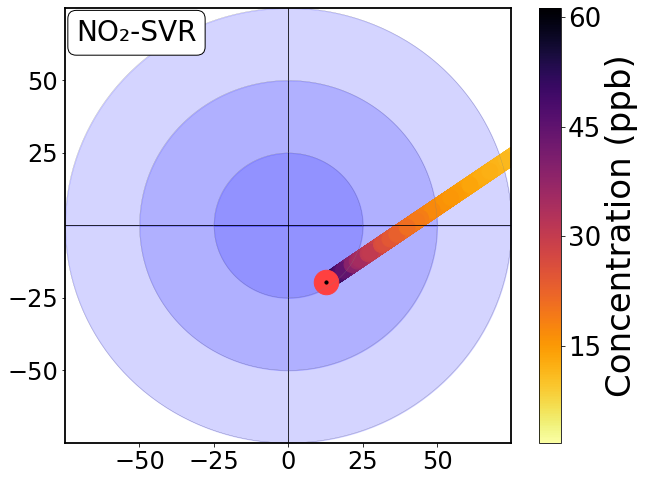

In [434]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=24)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=24)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,15,30,45,60,75])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = textstr = 'NO2-SVR'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-25,-7, 'T25'.translate(subscript),fontsize=24)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
#plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_NO2_SVR.pdf", format="pdf", bbox_inches="tight")
plt.show()

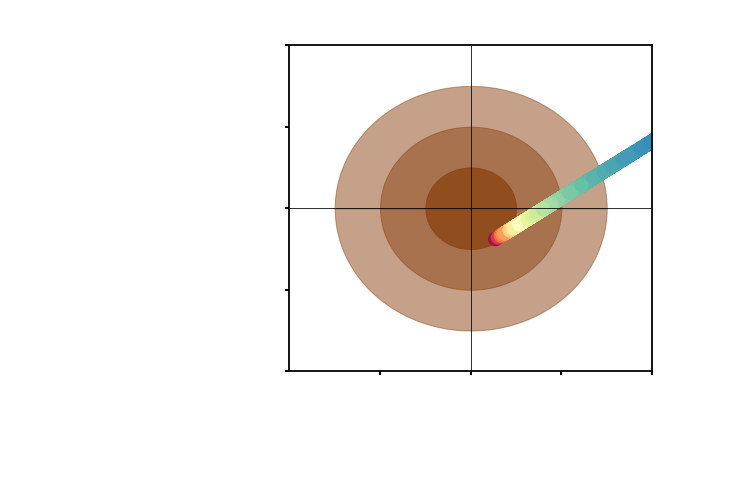

In [435]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=25
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 25, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_NO2_SVR1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

## Model 3: Random Forest

In [436]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(max_features=0.30888259687906783, max_leaf_nodes=1564,
                      n_estimators=194, n_jobs=-1,min_samples_split= 2,min_samples_leaf= 1, 
                                  random_state = 0,max_depth=None,bootstrap=False)
  
# fit the regressor with x and y data
regressor.fit(X_train.drop(['Lab1'], axis=1), y_train)  

RandomForestRegressor(bootstrap=False, max_features=0.30888259687906783,
                      max_leaf_nodes=1564, n_estimators=194, n_jobs=-1,
                      random_state=0)

In [437]:
Index=[i for i in range(len(y_test))]
features_NO2=regressor.feature_importances_
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
pred_rf_no2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_NO2=sMAPE_lr
RMSE_rf_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_rf_NO2=Pearson_lr
R2_rf_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_NO2=RMSE_lr
Pearson_rf_NO2,R2_rf_NO2,RMSE_Rf_NO2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.96, 0.9, 3.6)

fig= plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='indigo',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.79,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
plt.text(B-15, C,r'$R^{2}(RF)=$'+str(R2_rf_NO2) , fontsize = 14, color='indigo')
plt.text(B-15, D,r'$R^{2}(Lab)=$'+str(R2_lab_NO2) , fontsize = 14, color='#426eff')
plt.text(B-73, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-73, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
plt.xlabel('Last 100 hours of testing period',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [438]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_RF_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_NO2=CRMSE(y_test,pred)/np.std(y_test)
pred_rf=pred

Regressor model performance:
Mean absolute error(MAE) = 2.92
Mean squared error(MSE) = 13.18
Median absolute error = 2.6
Explain variance score = 0.91
R2 score = 0.9


In [439]:
import random
alpha=1.4
LV=max(y_test)+5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=median
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=LQ
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

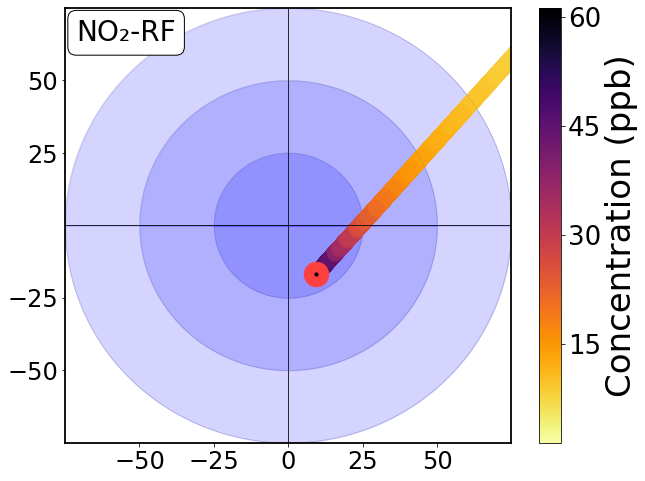

In [440]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=24)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=24)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,15,30,45,60,75])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = textstr = 'NO2-RF'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-25,-7, 'T25'.translate(subscript),fontsize=24)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
#plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_NO2_RF.pdf", format="pdf", bbox_inches="tight")
plt.show()

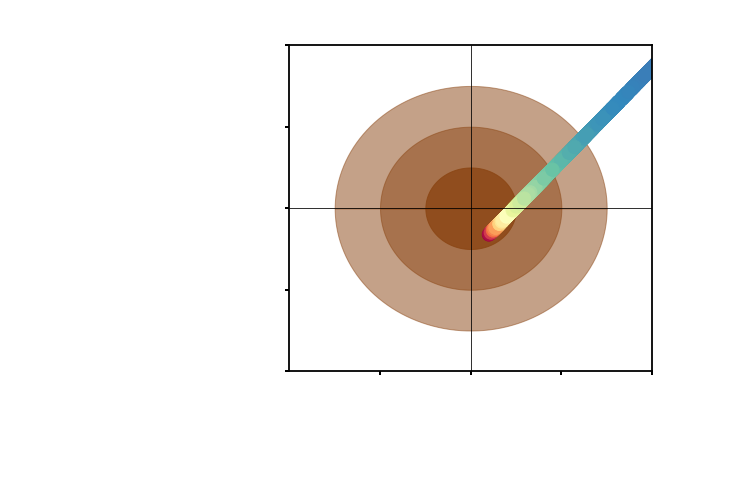

In [441]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=25
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 25, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_NO2_RF1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

## Model 4 : ANN

In [442]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (7,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 6)                 48        
_________________________________________________________________
dense_44 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_45 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_46 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 101       
Total params: 30,457
Trainable params: 30,457
Non-trainable params: 0
_________________________________________________________________


In [443]:
scaler = StandardScaler()
scaler.fit(X_train.drop(['Lab1'], axis=1))
X_train_scaled=scaler.transform(X_train.drop(['Lab1'], axis=1))
X_test_scaled=scaler.transform(X_test.drop(['Lab1'], axis=1))
model.fit(X_train_scaled, y_train, batch_size= 100, epochs=100, verbose= 0)

In [444]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

2608

In [445]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_NO2=sMAPE_lr
RMSE_ann_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_ann_NO2=Pearson_lr
R2_ann_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_NO2=RMSE_lr
Pearson_ann_NO2,R2_ann_NO2,RMSE_Ann_NO2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.94, 0.86, 4.3)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='tomato',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('NO2 Concentration(ppb)',fontsize=18)
#plt.text(B-150, C, r'$R^{2}(ANN)=$'+str(R2_ann_NO2), fontsize = 14, color='tomato')
#plt.text(B-150, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title(' Artificial Neural Network(ANN)  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [446]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_NO2=CRMSE(y_test,pred)/(np.std(y_test))
pred_ann=pred

Regressor model performance:
Mean absolute error(MAE) = 3.28
Mean squared error(MSE) = 18.19
Median absolute error = 2.67
Explain variance score = 0.88
R2 score = 0.86


In [447]:
import random
alpha=1.4
LV=max(y_test)+5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=median
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=LQ
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

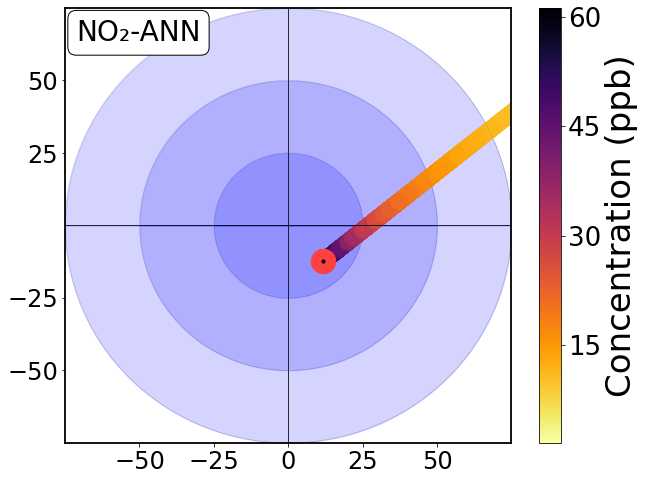

In [448]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=24)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=24)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,15,30,45,60,75])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = textstr = 'NO2-ANN'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-25,-7, 'T25'.translate(subscript),fontsize=24)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
#plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_NO2_ANN.pdf", format="pdf", bbox_inches="tight")
plt.show()

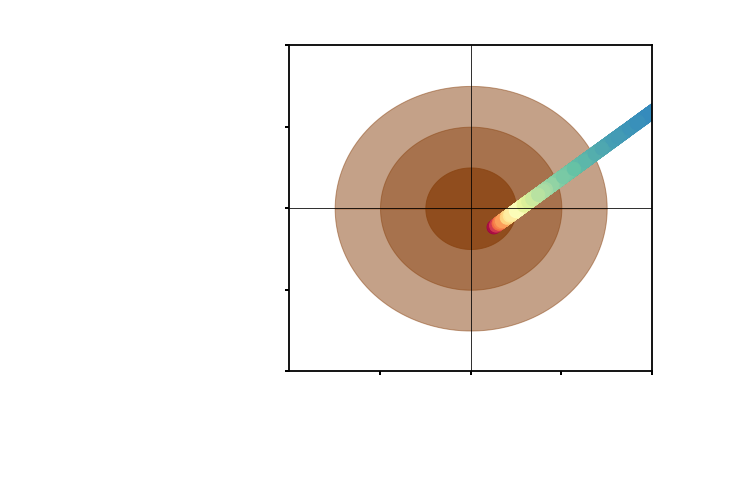

In [449]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=25
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 25, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_NO2_ANN1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

# Model 5: XGBoost

In [450]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model =XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.6707587713163239, colsample_bynode=1,
             colsample_bytree=0.8537810552612592, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.03751721359159872,
             max_delta_step=0, max_depth=0, max_leaves=65,
             min_child_weight=2.7540944694192047,
             monotone_constraints='()', n_estimators=499, n_jobs=-1,
             num_parallel_tree=1, random_state=0,
             reg_alpha=0.0017451960573349064, reg_lambda=0.0014745070199918,
             scale_pos_weight=1, subsample=0.5146065456700301,
             tree_method='hist', use_label_encoder=False, validate_parameters=1,
             verbosity=0)
model.fit(X_train.drop(['Lab1'], axis=1),y_train)

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.6707587713163239, colsample_bynode=1,
             colsample_bytree=0.8537810552612592, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.03751721359159872,
             max_delta_step=0, max_depth=0, max_leaves=65,
             min_child_weight=2.7540944694192047, missing=nan,
             monotone_constraints='()', n_estimators=499, n_jobs=-1,
             num_parallel_tree=1, random_state=0,
             reg_alpha=0.0017451960573349064, reg_lambda=0.0014745070199918,
             scale_pos_weight=1, subsample=0.5146065456700301,
             tree_method='hist', use_label_encoder=False, validate_parameters=1,
             verbosity=0)

In [451]:
pred = model.predict(X_test.drop(['Lab1'], axis=1))
pred_xgb_no2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_NO2=sMAPE_lr
RMSE_xgb_NO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_NO2=Pearson_lr
R2_xgb_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_NO2=RMSE_lr
Pearson_xgb_NO2,R2_xgb_NO2,RMSE_Xgb_NO2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.96, 0.91, 3.5)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='darkgoldenrod',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.69,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-150, C, r'$R^{2}(XGB)=$'+str(R2_xgb_NO2), fontsize = 14, color='darkgoldenrod')
#plt.text(B-150, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('XGBoost  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [452]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_XGB_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_NO2=CRMSE(y_test,pred)/np.std(y_test)
pred_xgb=pred

Regressor model performance:
Mean absolute error(MAE) = 2.78
Mean squared error(MSE) = 12.54
Median absolute error = 2.32
Explain variance score = 0.91
R2 score = 0.91


In [453]:
import random
alpha=1.4
LV=max(y_test)+5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=median
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=LQ
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

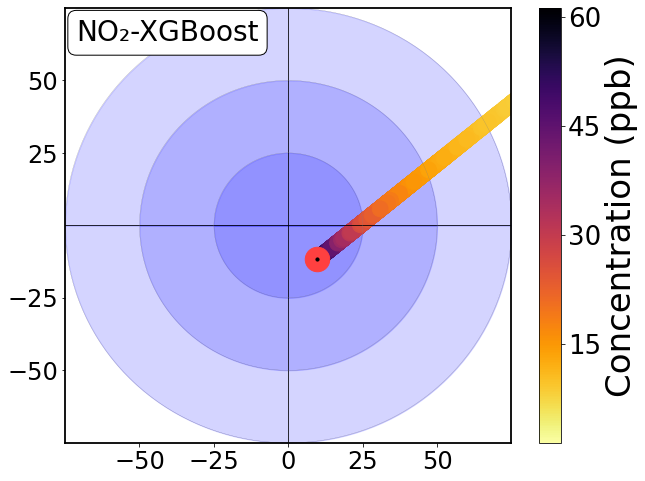

In [454]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=24)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=24)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,15,30,45,60,75])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = textstr = 'NO2-XGBoost'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-25,-7, 'T25'.translate(subscript),fontsize=24)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
#plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_NO2_XGB.pdf", format="pdf", bbox_inches="tight")
plt.show()

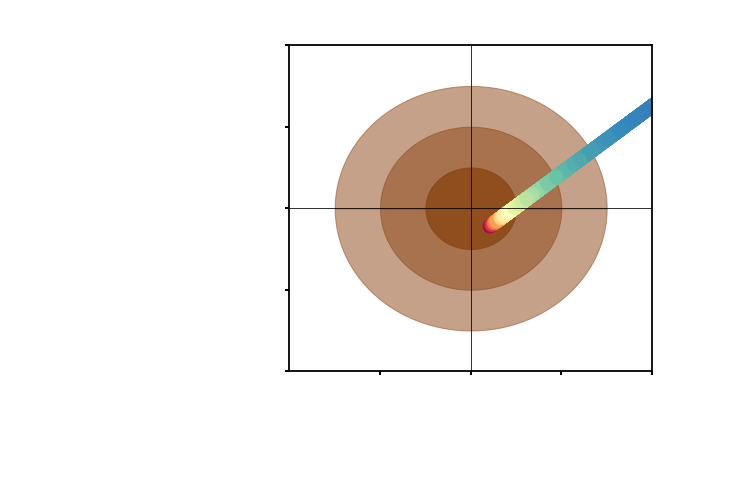

In [455]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=25
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 25, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_NO2_XGB1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

 # SO2 Calibration

In [456]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
signal=np.array(WE)-np.array(AE)
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

In [457]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
signal=np.array(WE)-np.array(AE)
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
CO_Data=CO_Data.resample('5min').mean()
CO_Data=CO_Data.dropna()
SO2_Data.head()

,WE,AE,Temp,RH,Ref,Lab2,Net Signal,Month,Day_of_week,Day,Hour
Date,,,,,,,,,,,
2019-10-10 04:15:00,342.991196,342.255475,18.268917,81.793083,1.085790,7.660248,0.735722,10,3,10,4
2019-10-10 04:45:00,345.767413,342.543745,18.359000,82.451958,1.163473,15.077802,3.223668,10,3,10,4
2019-10-10 04:50:00,343.919310,342.689191,18.348826,82.572044,1.200187,9.035877,1.230119,10,3,10,4
2019-10-10 04:55:00,343.377326,342.448811,18.353612,82.675760,1.312772,8.189301,0.928515,10,3,10,4
2019-10-10 05:00:00,343.358621,342.322426,18.351611,82.723472,1.237584,8.546278,1.036195,10,3,10,5


# Model 1: Linear Regression (LR)

In [458]:
df1=[x for _, x in SO2_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]

data_Oct=data_oct.resample('5min').mean()
data_Oct=data_Oct.dropna()
data_Oct1=data_Oct[:int(0.8*data_Oct.shape[0])]
data_Oct2=data_Oct[int(0.8*data_Oct.shape[0]):]
data_Nov=data_nov.resample('5min').mean()
data_Nov=data_Nov.dropna()
data_Nov1=data_Nov[:int(0.8*data_Nov.shape[0])]
data_Nov2=data_Nov[int(0.8*data_Nov.shape[0]):]
data_Dec=data_dec.resample('5min').mean()
data_Dec=data_Dec.dropna()
data_Dec1=data_Dec[:int(0.8*data_Dec.shape[0])]
data_Dec2=data_Dec[int(0.8*data_Dec.shape[0]):]
data_Jan=data_jan.resample('5min').mean()
data_Jan=data_Jan.dropna()
data_Jan1=data_Jan[:int(0.8*data_Jan.shape[0])]
data_Jan2=data_Jan[int(0.8*data_Jan.shape[0]):]
data_Feb=data_feb.resample('5min').mean()
data_Feb=data_Feb.dropna()
data_Feb1=data_Feb[:int(0.8*data_Feb.shape[0])]
data_Feb2=data_Feb[int(0.8*data_Feb.shape[0]):]
data_Mar=data_mar.resample('5min').mean()
data_Mar=data_Mar.dropna()
data_Mar1=data_Mar[:int(0.8*data_Mar.shape[0])]
data_Mar2=data_Mar[int(0.8*data_Mar.shape[0]):]
frame1=[data_Oct1,data_Nov1,data_Dec1,data_Jan1,data_Feb1,data_Mar1]
frame2=[data_Oct2,data_Nov2,data_Dec2,data_Jan2,data_Feb2,data_Mar2]
SO2_data1=pd.concat(frame1)
SO2_data2=pd.concat(frame2)
SO2_data=pd.concat([SO2_data1,SO2_data2])

In [459]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
#X=N3_data[['Sen_2.5','T','RH','Month','Day_of_week','Hour']]
#y=N3_data['Ref_2.5']
X=SO2_data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle=False)
len(X_test)

3471

In [460]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)
lab1=X_test['Lab2'].to_list()
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_SO2=sMAPE_lr
RMSE_lr_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_lr_SO2=Pearson_lr
sMAPE_lab_SO2=sMAPE_lab
RMSE_lab_SO2=RMSE_lab/np.mean(np.array(lab1))
Pearson_lab_SO2=Pearson_lab
R2_lr_SO2=round(sm.r2_score(y_test, pred), 2)
R2_lab_SO2=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_SO2=RMSE_lr
RMSE_Lab_SO2=RMSE_lab

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


In [461]:
import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/(LV))*100
Random=(2*(P1+P2)**0.5/(LV))*100


import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

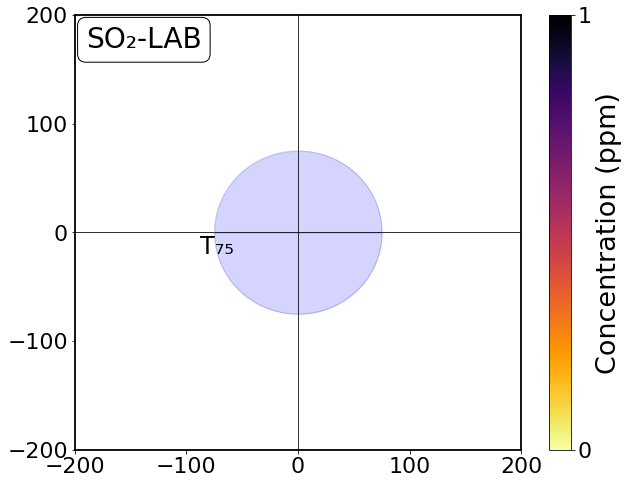

In [462]:
A4=target(lab1,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

#plt.fill_between(a1, b1, color='blue', alpha=0.17)
#plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

#plt.plot(x1,y1, linewidth=0.2, color='grey')
#plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
#plt.plot(x2,y2, linewidth=0.2, color='grey')
#plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

#plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
#plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
#plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
#plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-200)
plt.xticks(np.arange(-75,75),fontsize=22)
plt.xticks([-200,-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-200,-100,0,100,200],fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,1,2,3])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=27)
plt.scatter(Random,Bias+0.2,marker="d",s=900, color='teal')
textstr = 'SO2-LAB'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-25,-7, 'T25'.translate(subscript),fontsize=18)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=18)
plt.text(-88,-20, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_SO2_LAB.pdf", format="pdf", bbox_inches="tight")
plt.show()

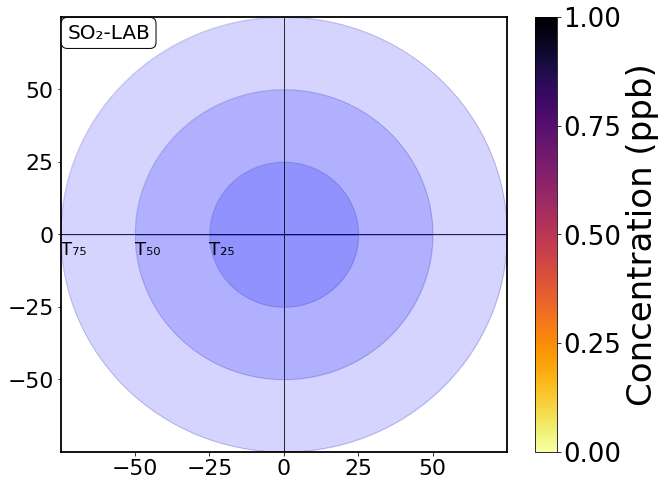

In [463]:
A4=target(lab1,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2]),cmap=reversed_color_map)
plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2]),cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,75),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=22)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,0,25,50],fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75,1])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="*",s=600, color='teal')
textstr = 'SO2-LAB'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.015, 0.985, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
plt.text(-25,-7, 'T25'.translate(subscript),fontsize=18)
plt.text(-50,-7, 'T50'.translate(subscript),fontsize=18)
plt.text(-75,-7, 'T75'.translate(subscript),fontsize=18)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_SO2_LAB.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [464]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/(LV))*100
Random=(2*(P1+P2)**0.5/(LV))*100

import random
alpha=1.4
LV=12.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

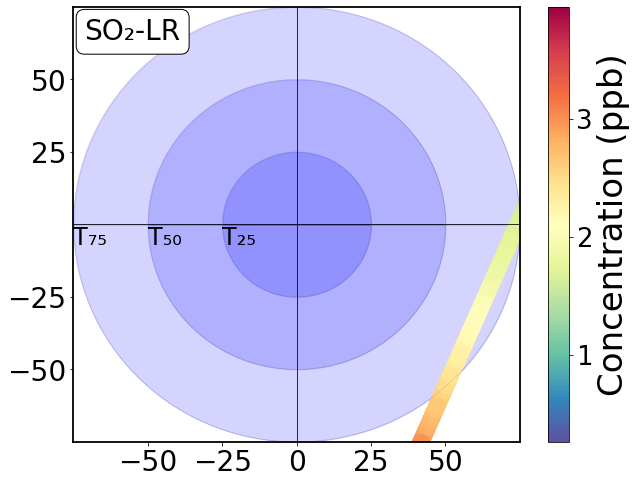

In [465]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=28)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=28)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,1,2,3,4,5])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = textstr = 'SO2-LR'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
plt.text(-25,-7, 'T25'.translate(subscript),fontsize=24)
plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_SO2_LR.pdf", format="pdf", bbox_inches="tight")
plt.show()

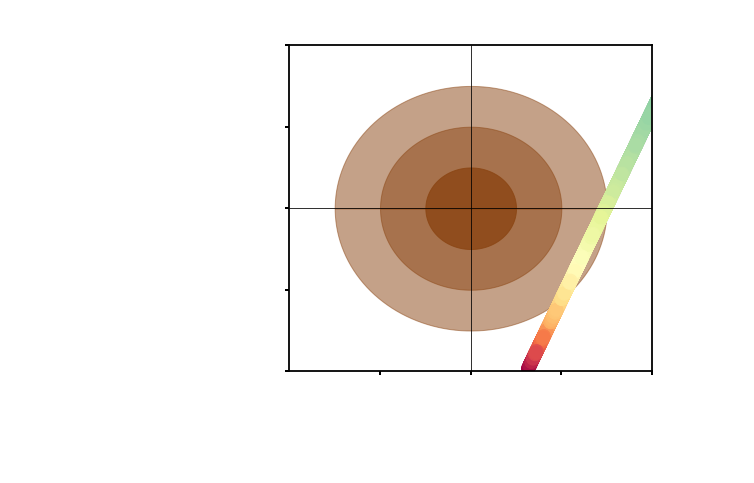

In [466]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=25
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 25, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_SO2_LR1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

## Scaling Laboratory Calibration
For the purpose of visual comparison with the ref and calibrated measurements, the lab measurement was scaled by a factor of 0.05

In [467]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
MBE_LR_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_SO2=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_SO2=MBE(lab1,y_test)/(25*np.std(y_test))
CRMSE_LAB_SO2=CRMSE(y_test,lab1)/25*(np.std(y_test))
pred_lr=pred

Regressor model performance:
Mean absolute error(MAE) = 0.5
Mean squared error(MSE) = 0.38
Median absolute error = 0.43
Explain variance score = 0.23
R2 score = 0.19


# Model 2: SVR

In [468]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'poly',degree=3)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

In [469]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_SO2=sMAPE_lr
RMSE_svr_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_svr_SO2=Pearson_lr
R2_svr_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_SO2=RMSE_lr

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='brown',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'LAB-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-200, C,r'$R^{2}(SVR)=$'+str(R2_svr_SO2) , fontsize = 14, color='brown')
#plt.text(B-200, D, r'$R^{2}(Lab)=$'+str(R2_lab_SO2), fontsize = 14, color='#426eff')
#plt.text(B-420, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-420, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [470]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_svr=pred

Regressor model performance:
Mean absolute error(MAE) = 0.45
Mean squared error(MSE) = 0.33
Median absolute error = 0.39
Explain variance score = 0.32
R2 score = 0.29


In [471]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/(LV))*100
Random=(2*(P1+P2)**0.5/(LV))*100

import random
alpha=1.4
LV=12.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

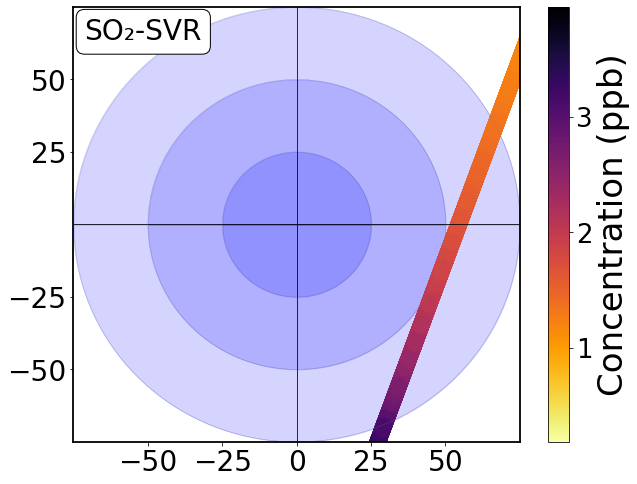

In [472]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=28)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=28)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,1,2,3,4,5])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = textstr = 'SO2-SVR'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-25,-7, 'T25'.translate(subscript),fontsize=24)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
#plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_SO2_SVR.pdf", format="pdf", bbox_inches="tight")
plt.show()

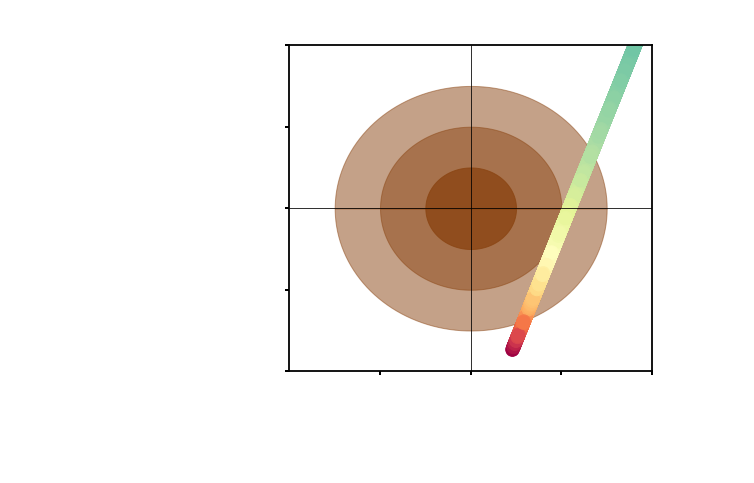

In [473]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=25
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 25, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_SO2_SVR1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

 # Model 3: Random Forest

In [474]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(max_features=0.28087865827498987, max_leaf_nodes=776,
                      n_estimators=1291, n_jobs=-1)
  
# fit the regressor with x and y data
regressor=regressor.fit(X_train, y_train)  

In [475]:
Index=[i for i in range(len(y_test))]
features_SO2=regressor.feature_importances_
pred = regressor.predict(X_test)
pred_rf_so2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_SO2=sMAPE_lr
RMSE_rf_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_rf_SO2=Pearson_lr
R2_rf_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_SO2=RMSE_lr

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='indigo',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.72,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
plt.text(B-20, C,r'$R^{2}(RF)=$'+str(R2_rf_SO2) , fontsize = 14, color='indigo')
plt.text(B-20, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2) , fontsize = 14, color='#426eff')
plt.text(B-70, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [476]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_RF_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_rf=pred

Regressor model performance:
Mean absolute error(MAE) = 0.48
Mean squared error(MSE) = 0.38
Median absolute error = 0.4
Explain variance score = 0.21
R2 score = 0.18


In [477]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/(LV))*100
Random=(2*(P1+P2)**0.5/(LV))*100

import random
alpha=1.4
LV=12.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

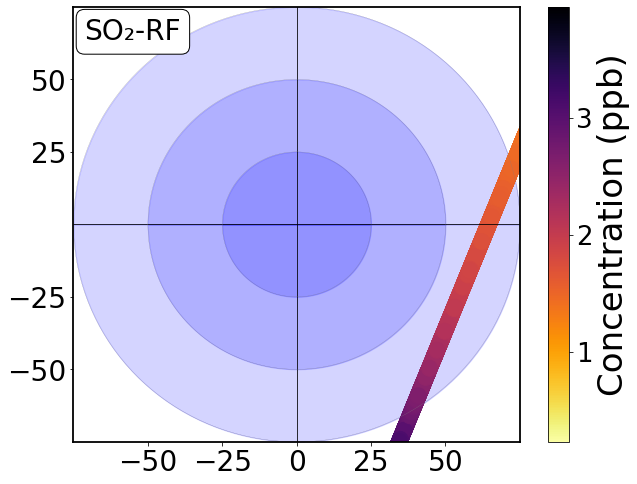

In [478]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=28)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=28)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,1,2,3,4,5])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = textstr = 'SO2-RF'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-25,-7, 'T25'.translate(subscript),fontsize=24)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
#plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_SO2_RF.pdf", format="pdf", bbox_inches="tight")
plt.show()

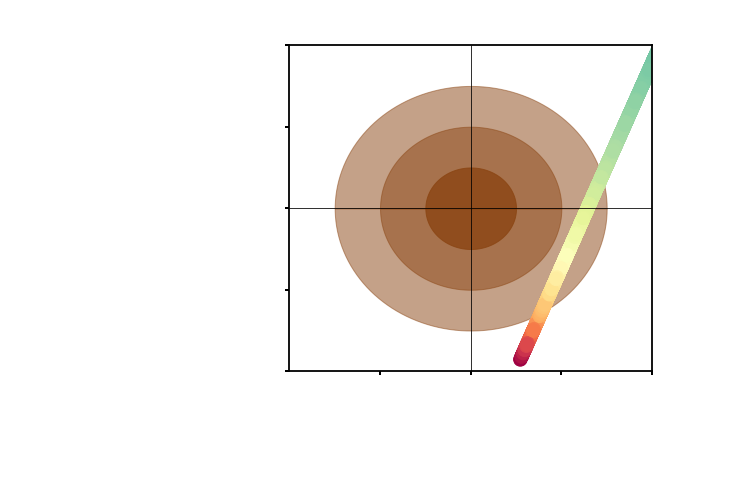

In [479]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=25
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 25, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_SO2_RF1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

# Model 4 : ANN

In [480]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (7,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(50, kernel_initializer='normal',activation= 'relu'))
#model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 6)                 48        
_________________________________________________________________
dense_49 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_50 (Dense)             (None, 50)                6450      
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 51        
Total params: 7,445
Trainable params: 7,445
Non-trainable params: 0
_________________________________________________________________


In [481]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled, y_train, batch_size= 200, epochs=100, verbose= 0)

In [482]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

3471

In [483]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_SO2=sMAPE_lr
RMSE_ann_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_ann_SO2=Pearson_lr
R2_ann_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_SO2=RMSE_lr

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='tomato',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-200, C,r'$R^{2}(ANN)=$'+str(R2_ann_SO2) , fontsize = 14, color='tomato')
#plt.text(B-200, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2) , fontsize = 14, color='#426eff')
#plt.text(B-400, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-400, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Artificial Neural Network(ANN)  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [484]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_ann=pred

Regressor model performance:
Mean absolute error(MAE) = 0.5
Mean squared error(MSE) = 0.45
Median absolute error = 0.37
Explain variance score = 0.06
R2 score = 0.04


In [485]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/(LV))*100
Random=(2*(P1+P2)**0.5/(LV))*100


import random
alpha=1.4
LV=12.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

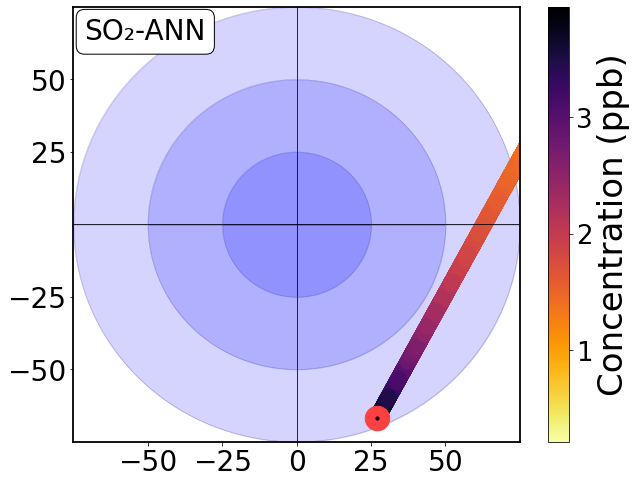

In [486]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=28)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=28)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,1,2,3,4,5])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = textstr = 'SO2-ANN'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-25,-7, 'T25'.translate(subscript),fontsize=24)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
#plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_SO2_ANN.pdf", format="pdf", bbox_inches="tight")
plt.show()

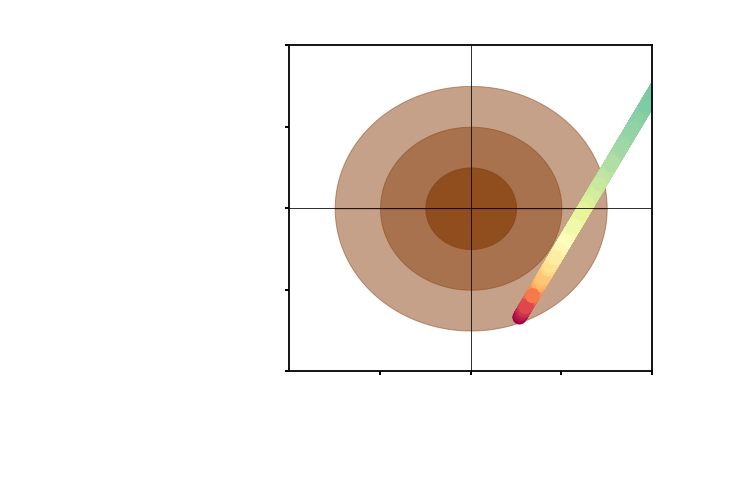

In [487]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=25
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 25, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_SO2_ANN1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

# Model 5 : XGBoost

In [488]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)

model.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eta=0.01, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [489]:
pred = model.predict(X_test)
pred_xgb_so2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_SO2=sMAPE_lr
RMSE_xgb_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_SO2=Pearson_lr
R2_xgb_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_SO2=RMSE_lr

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='darkgoldenrod',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'LAB-Calibrated(scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-200, C,r'$R^{2}(XGB)=$'+str(R2_xgb_SO2) , fontsize = 14, color='darkgoldenrod')
#plt.text(B-200, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2), fontsize = 14, color='#426eff')
#plt.text(B-400, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
#plt.text(B-400, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('XGBoost  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [490]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_XGB_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_xgb=pred

Regressor model performance:
Mean absolute error(MAE) = 0.48
Mean squared error(MSE) = 0.4
Median absolute error = 0.37
Explain variance score = 0.19
R2 score = 0.15


In [491]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/(LV))*100
Random=(2*(P1+P2)**0.5/(LV))*100

import random
alpha=1.4
LV=12.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

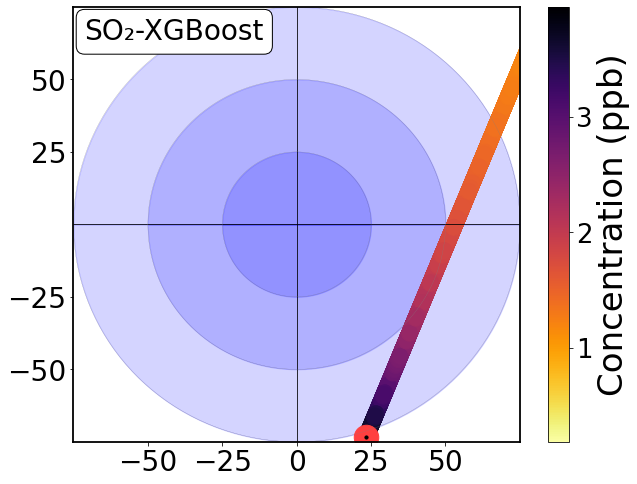

In [492]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=28)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=28)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,1,2,3,4,5])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = textstr = 'SO2-XGBoost'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-25,-7, 'T25'.translate(subscript),fontsize=24)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
#plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_SO2_XGB.pdf", format="pdf", bbox_inches="tight")
plt.show()

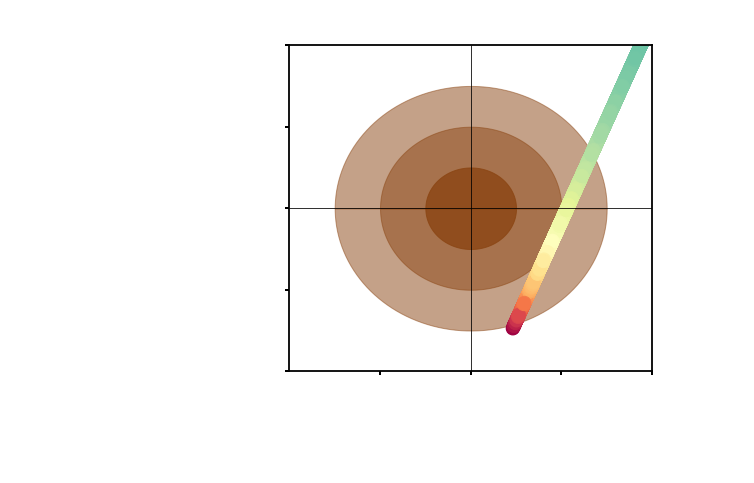

In [493]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=25
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 25, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_SO2_XGB1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

# O3 CALIBRATION

In [494]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('5min').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour,Ref_NO2
Date,,,,,,,,,,
2019-10-02 11:55:00,621.625704,26.378438,58.063437,46.094860,3.605625,10.0,2.0,2.0,11.0,15.230400
2019-10-02 12:10:00,1788.609900,25.500000,48.612609,55.810810,3.528696,10.0,2.0,2.0,12.0,6.665136
2019-10-02 12:15:00,287.254970,25.765087,48.441408,57.907075,17.781453,10.0,2.0,2.0,12.0,6.642805
2019-10-02 12:20:00,99.598353,26.120078,47.716553,58.880540,20.285180,10.0,2.0,2.0,12.0,2.844210
2019-10-07 10:50:00,105.723457,32.399528,37.143389,48.533490,11.862076,10.0,0.0,7.0,10.0,4.344894


In [495]:
#Ref=O3_Data['Ref'].to_list()
#O3_Data=O3_Data[O3_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#O3_Data.shape

## Model 1: LR

In [496]:
df1=[x for _, x in O3_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]

data_Oct=data_oct.resample('15min').mean()
data_Oct=data_Oct.dropna()
data_Oct1=data_Oct[:int(0.8*data_Oct.shape[0])]
data_Oct2=data_Oct[int(0.8*data_Oct.shape[0]):]
data_Nov=data_nov.resample('15min').mean()
data_Nov=data_Nov.dropna()
data_Nov1=data_Nov[:int(0.8*data_Nov.shape[0])]
data_Nov2=data_Nov[int(0.8*data_Nov.shape[0]):]
data_Dec=data_dec.resample('15min').mean()
data_Dec=data_Dec.dropna()
data_Dec1=data_Dec[:int(0.8*data_Dec.shape[0])]
data_Dec2=data_Dec[int(0.8*data_Dec.shape[0]):]
data_Jan=data_jan.resample('15min').mean()
data_Jan=data_Jan.dropna()
data_Jan1=data_Jan[:int(0.8*data_Jan.shape[0])]
data_Jan2=data_Jan[int(0.8*data_Jan.shape[0]):]
data_Feb=data_feb.resample('15min').mean()
data_Feb=data_Feb.dropna()
data_Feb1=data_Feb[:int(0.8*data_Feb.shape[0])]
data_Feb2=data_Feb[int(0.8*data_Feb.shape[0]):]
data_Mar=data_mar.resample('15min').mean()
data_Mar=data_Mar.dropna()
data_Mar1=data_Mar[:int(0.8*data_Mar.shape[0])]
data_Mar2=data_Mar[int(0.8*data_Mar.shape[0]):]
frame1=[data_Oct1,data_Nov1,data_Dec1,data_Jan1,data_Feb1,data_Mar1]
frame2=[data_Oct2,data_Nov2,data_Dec2,data_Jan2,data_Feb2,data_Mar2]
O3_data1=pd.concat(frame1)
O3_data2=pd.concat(frame2)
O3_data=pd.concat([O3_data1,O3_data2])
O3_data.shape

(12041, 10)

In [497]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle=False)
len(X_test)

2409

In [498]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)
lab1=X_test['Lab1'].to_list()
for i in range(len(lab1)):
    if lab1[i]>370:
        lab1[i]=np.mean(lab1)
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_O3=sMAPE_lr
RMSE_lr_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_lr_O3=Pearson_lr
sMAPE_lab_O3=sMAPE_lab
RMSE_lab_O3=RMSE_lab/np.mean(np.array(lab1))
Pearson_lab_O3=Pearson_lab
R2_lr_O3=round(sm.r2_score(y_test, pred), 2)
R2_lab_O3=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_O3=RMSE_lr
RMSE_Lab_O3=RMSE_lab

A=len(y_test)
D=max(lab1)-0.10*max(lab1)
C=max(lab1)-0.03*max(lab1)
B=A

Pearson_lr_O3,R2_lr_O3,RMSE_Lr_O3

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.96, 0.92, 4.3)

fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,len(y_test)+1)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test, color='limegreen',linewidth=3)
plt.plot(index,pred, color='#513e00',linewidth=3)
plt.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(LR)=$'+str(R2_lr_O3) , fontsize = 14, color='#513e00')
#plt.text(B-5, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.title('Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [499]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_LR_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_O3=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_O3=MBE(lab1,y_test)/(3.6*np.std(y_test))
CRMSE_LAB_O3=CRMSE(y_test,lab1)/(3.6*np.std(y_test))
pred_lr=pred

Regressor model performance:
Mean absolute error(MAE) = 3.49
Mean squared error(MSE) = 18.62
Median absolute error = 3.05
Explain variance score = 0.92
R2 score = 0.92


In [500]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

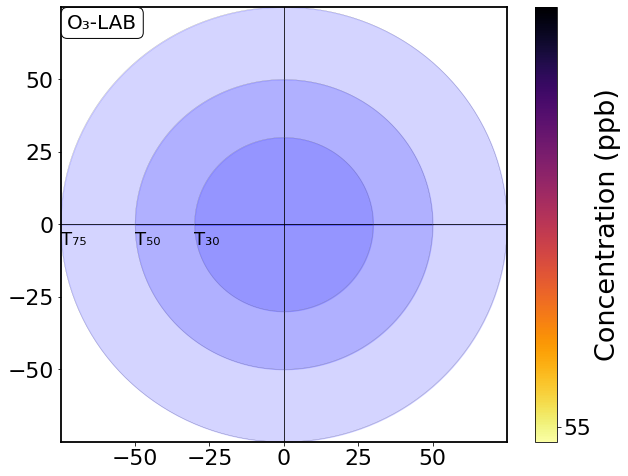

In [501]:
A4=target(lab1,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.15)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2]),cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2]),cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,75),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=22)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,0,25,50],fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[55,60,65])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=27)
plt.scatter(Random,Bias+0.2,marker="*",s=600, color='teal')
textstr = 'O3-LAB'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.015, 0.985, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
plt.text(-30,-7, 'T30'.translate(subscript),fontsize=18)
plt.text(-50,-7, 'T50'.translate(subscript),fontsize=18)
plt.text(-75,-7, 'T75'.translate(subscript),fontsize=18)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_O3_LAB.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [502]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

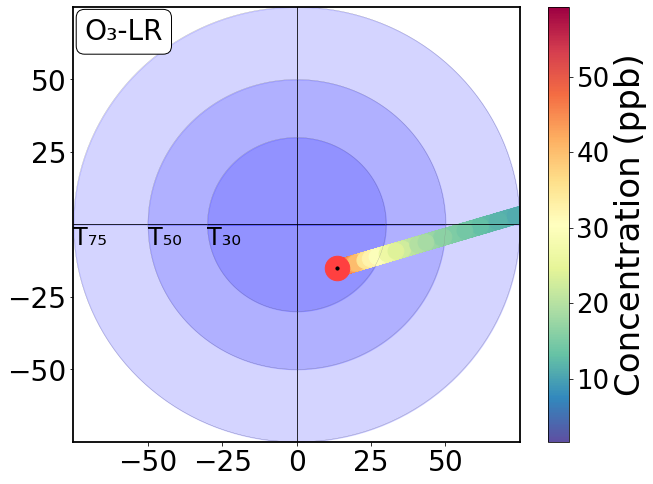

In [503]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=28)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=28)
#plt.colorbar()
cbar = plt.colorbar(ticks=[10,20,30,40,50,60])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = textstr = 'O3-LR'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
plt.text(-30,-7, 'T30'.translate(subscript),fontsize=24)
plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_O3_LR.pdf", format="pdf", bbox_inches="tight")
plt.show()

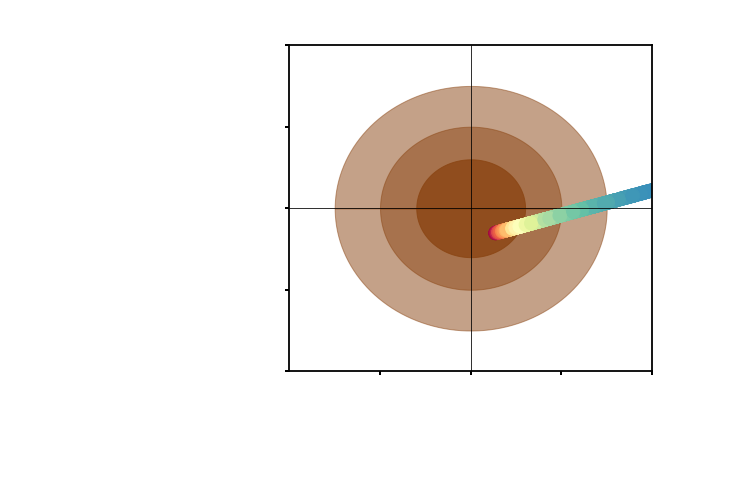

In [504]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=30
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 30, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_O3_LR1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

## Model 2: SVR

In [505]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

In [506]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_O3=sMAPE_lr
RMSE_svr_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_svr_O3=Pearson_lr
R2_svr_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_O3=RMSE_lr
Pearson_svr_O3,R2_svr_O3,RMSE_Svr_O3

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.97, 0.94, 3.7)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test, color='limegreen',linewidth=3)
plt.plot(index,pred, color='brown',linewidth=3)
plt.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(SVR)=$'+str(R2_svr_O3) , fontsize = 14, color='brown')
#plt.text(B-5, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Support Vector Regression(SVR) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [507]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_svr=pred

Regressor model performance:
Mean absolute error(MAE) = 2.93
Mean squared error(MSE) = 13.91
Median absolute error = 2.4
Explain variance score = 0.94
R2 score = 0.94


In [508]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

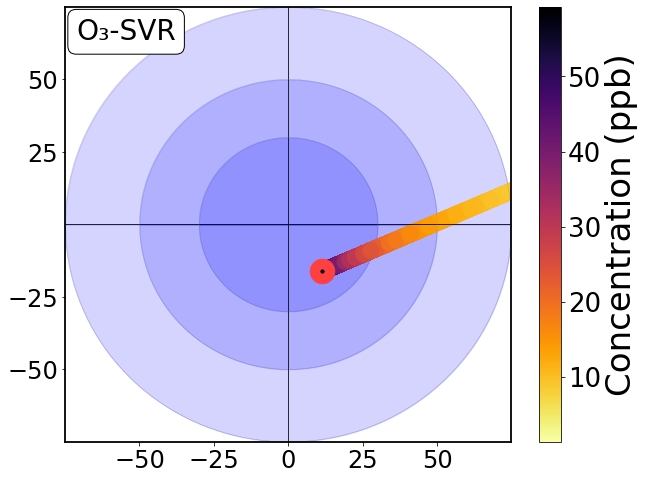

In [509]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=24)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=24)
#plt.colorbar()
cbar = plt.colorbar(ticks=[10,20,30,40,50,60])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = textstr = 'O3-SVR'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-30,-7, 'T30'.translate(subscript),fontsize=24)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
#plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_O3_SVR.pdf", format="pdf", bbox_inches="tight")
plt.show()

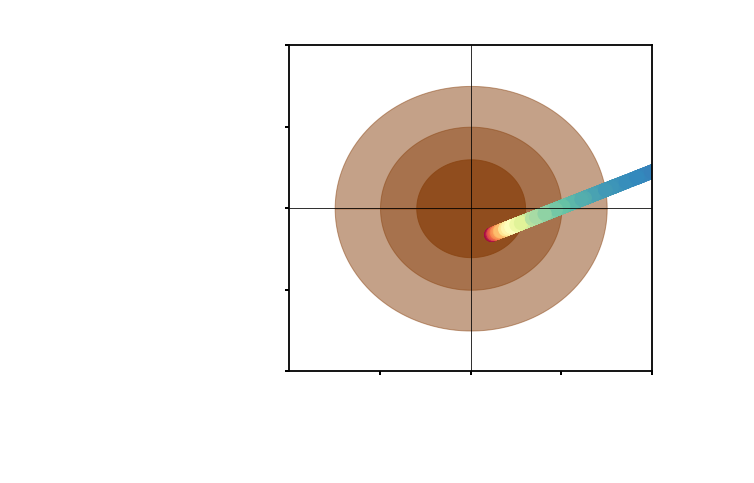

In [510]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=30
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 30, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_O3_SVR1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

##  Model 3 : Random Forest

In [511]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor =RandomForestRegressor(max_features=0.4920275171813018, max_leaf_nodes=1267,
                      n_estimators=318, n_jobs=-1)
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(max_features=0.4920275171813018, max_leaf_nodes=1267,
                      n_estimators=318, n_jobs=-1)

In [512]:
Index=[i for i in range(len(y_test))]
features_O3=regressor.feature_importances_
pred = regressor.predict(X_test)
pred_rf_o3=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_O3=sMAPE_lr
RMSE_rf_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_rf_O3=Pearson_lr
R2_rf_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_O3=RMSE_lr
Pearson_rf_O3,R2_rf_O3,RMSE_Rf_O3

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.98, 0.96, 3.2)

fig= plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='indigo',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.79,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
plt.text(B-22, C,r'$R^{2}(RF)=$'+str(R2_rf_O3) , fontsize = 14, color='indigo')
plt.text(B-22, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
plt.text(B-72, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-72, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 100 hours of testing period',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Random Forest(RF) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [513]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
MBE_RF_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_rf=pred

Regressor model performance:
Mean absolute error(MAE) = 2.35
Mean squared error(MSE) = 10.01
Median absolute error = 1.74
Explain variance score = 0.96
R2 score = 0.96


In [514]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

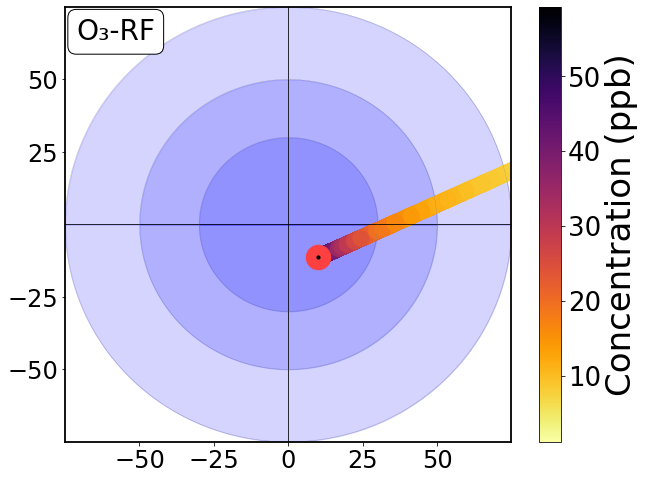

In [515]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=24)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=24)
#plt.colorbar()
cbar = plt.colorbar(ticks=[10,20,30,40,50,60])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = textstr = 'O3-RF'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-30,-7, 'T30'.translate(subscript),fontsize=24)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
#plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_O3_RF.pdf", format="pdf", bbox_inches="tight")
plt.show()

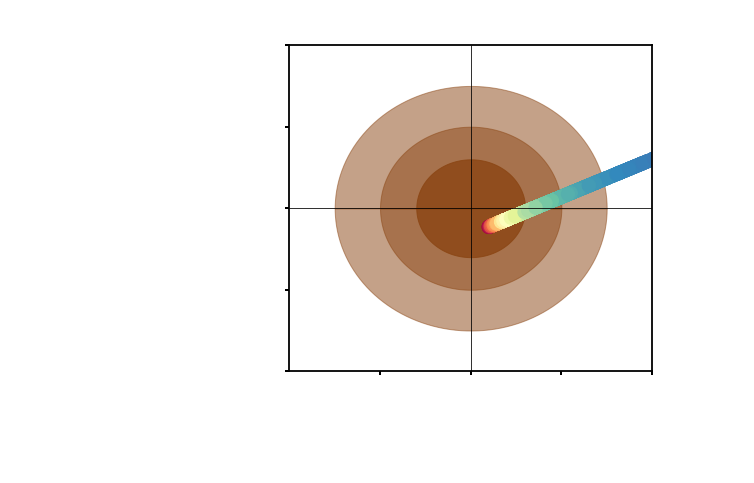

In [516]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=30
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 30, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_O3_RF1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

## Model 4: ANN

In [517]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (8,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_53 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_54 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_55 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 101       
Total params: 30,463
Trainable params: 30,463
Non-trainable params: 0
_________________________________________________________________


In [518]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled, y_train, batch_size= 100, epochs=200, verbose= 0)

In [519]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

2409

In [520]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_O3=sMAPE_lr
RMSE_ann_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_ann_O3=Pearson_lr
R2_ann_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_O3=RMSE_lr
Pearson_ann_O3,R2_ann_O3,RMSE_Ann_O3

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.98, 0.95, 3.2)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='tomato',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppm)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(ANN)=$'+str(R2_ann_O3) , fontsize = 14, color='tomato')
#plt.text(B-5, D, r'$R^{2}(Lab)=$'+str(R2_lab_O3), fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Artificial Neural Network(ANN) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [521]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_ann=pred

Regressor model performance:
Mean absolute error(MAE) = 2.34
Mean squared error(MSE) = 10.5
Median absolute error = 1.6
Explain variance score = 0.95
R2 score = 0.95


In [522]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

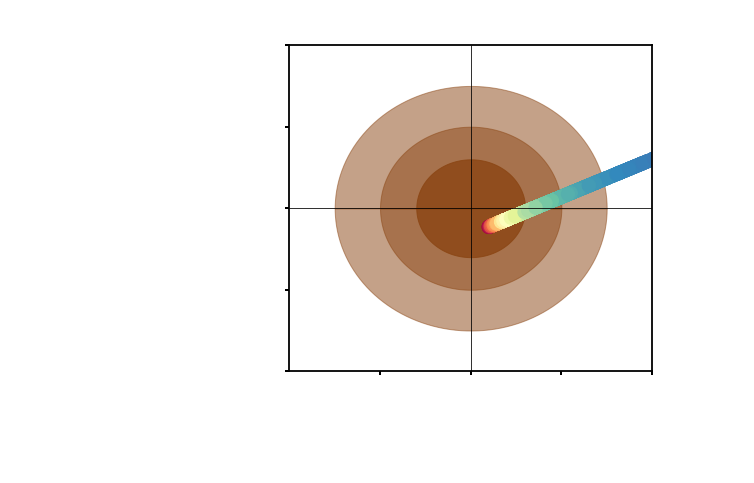

In [523]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=30
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 30, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias,marker="o",s=350, color='#A2CD5A')
#plt.scatter(Random,Bias,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_O3_ANN1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

# Model 5:  XGBoost

In [524]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.9653704353298734, colsample_bynode=1,
             colsample_bytree=0.7225699606707784, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.025578608080118973,
             max_delta_step=0, max_depth=0, max_leaves=55,
             min_child_weight=0.9411716091772624,
             monotone_constraints='()', n_estimators=1917, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.17587838916410176,
             reg_lambda=15.748976687207163, scale_pos_weight=1,
             subsample=0.9933923477413587, tree_method='hist',
             use_label_encoder=False, validate_parameters=1, verbosity=0)

model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.9653704353298734, colsample_bynode=1,
             colsample_bytree=0.7225699606707784, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.025578608080118973,
             max_delta_step=0, max_depth=0, max_leaves=55,
             min_child_weight=0.9411716091772624, missing=nan,
             monotone_constraints='()', n_estimators=1917, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.17587838916410176,
             reg_lambda=15.748976687207163, scale_pos_weight=1,
             subsample=0.9933923477413587, tree_method='hist',
             use_label_encoder=False, validate_parameters=1, verbosity=0)

In [525]:
pred = model.predict(X_test)
pred_xgb_o3=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_O3=sMAPE_lr
RMSE_xgb_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_O3=Pearson_lr
R2_xgb_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_O3=RMSE_lr
Pearson_xgb_O3,R2_xgb_O3,RMSE_Xgb_O3

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.98, 0.96, 2.9)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='darkgoldenrod',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(XGB)=$'+str(R2_xgb_O3) , fontsize = 14, color='darkgoldenrod')
#plt.text(B-5, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('XGBoost vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [526]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
MBE_XGB_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_xgb=pred

Regressor model performance:
Mean absolute error(MAE) = 2.15
Mean squared error(MSE) = 8.45
Median absolute error = 1.6
Explain variance score = 0.96
R2 score = 0.96


In [527]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

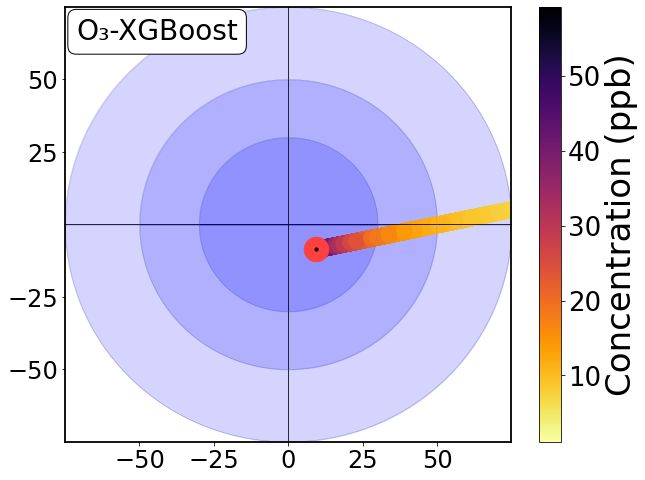

In [528]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=24)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=24)
#plt.colorbar()
cbar = plt.colorbar(ticks=[10,20,30,40,50,60])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = textstr = 'O3-XGBoost'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-30,-7, 'T30'.translate(subscript),fontsize=24)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
#plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_O3_XGB.pdf", format="pdf", bbox_inches="tight")
plt.show()

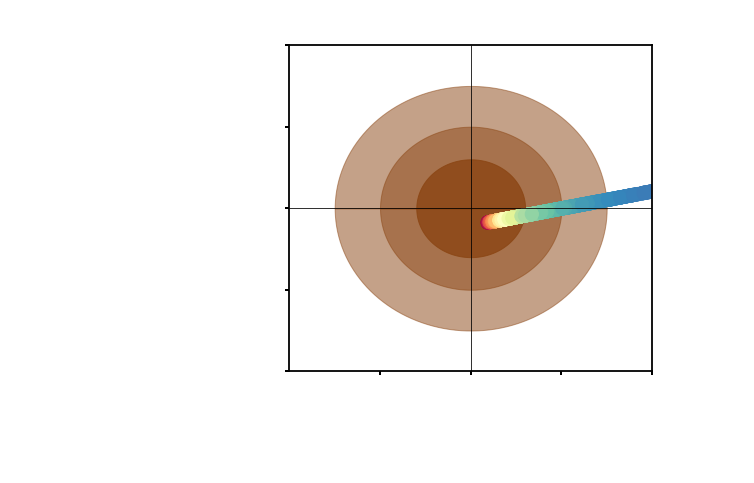

In [529]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=30
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 30, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='#8B4513', alpha=0.8)
plt.fill_between(a2, b2, color='#8B4513', alpha=0.5)
plt.fill_between(a3, b3, color='#8B4513', alpha=0.5)
color_map = plt.cm.get_cmap('Spectral')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
#plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#EE3B3B',alpha=0.5)
#plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_O3_XGB1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

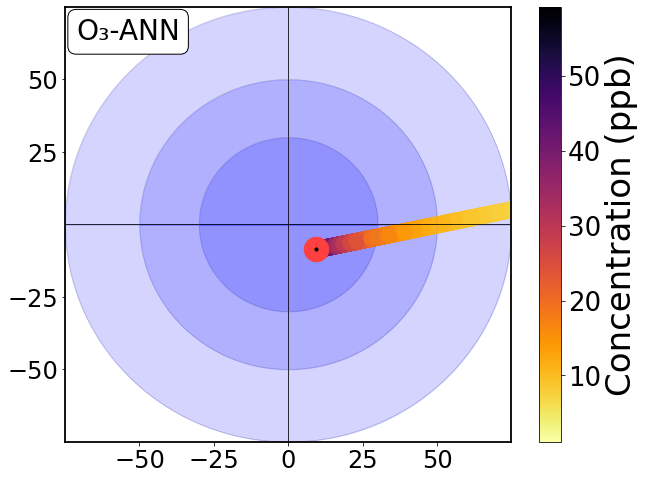

In [530]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.17)
plt.fill_between(a2, b2, color='blue',alpha=0.17)
plt.fill_between(a3, b3, color='blue',alpha=0.17)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
#plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-75)
plt.ylim(ymax=75)
plt.xlim(xmax=75)
plt.xlim(xmin=-75)
plt.xticks(np.arange(-75,76),fontsize=22)
plt.xticks([-50,-25,0,25,50],fontsize=24)

plt.yticks(np.arange(-75,75),fontsize=22)
plt.yticks([-50,-25,25,50],fontsize=24)
#plt.colorbar()
cbar = plt.colorbar(ticks=[10,20,30,40,50,60])
cbar.ax.tick_params(labelsize=26)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=34)
plt.scatter(Random,Bias+0.2,marker="o",s=600, color='#FF4040')
textstr = textstr = 'O3-ANN'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
#plt.text(-30,-7, 'T30'.translate(subscript),fontsize=24)
#plt.text(-50,-7, 'T50'.translate(subscript),fontsize=24)
#plt.text(-75,-7, 'T75'.translate(subscript),fontsize=24)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_O3_ANN.pdf", format="pdf", bbox_inches="tight")
plt.show()

theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius1=30
radius2=50
radius3=75
 
a1 = radius1 * np.cos( theta )
b1 = radius1 * np.sin( theta )
a2 = radius2 * np.cos( theta )
b2 = radius2 * np.sin( theta )
a3 = radius3 * np.cos( theta )
b3 = radius3 * np.sin( theta )


fig= plt.figure(figsize=(6.5,6))
ax = fig.add_subplot(111)
plt.Circle((0, 0), 30, color='wheat')
plt.Circle((0, 0), 50, color='wheat')
plt.Circle((0, 0), 75, color='wheat')
plt.fill_between(a1, b1, color='blue', alpha=0.25)
plt.fill_between(a2, b2, color='blue', alpha=0.25)
plt.fill_between(a3, b3, color='blue', alpha=0.25)
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=700,c=np.array(A4[2])/1000,cmap=reversed_color_map )
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
plt.scatter(Random,Bias+0.2,marker="o",s=350, color='#A2CD5A')
plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
#plt.xlabel('Relative random effect, RR (%)' ,fontsize=20)
#plt.ylabel('Relative bias, RB (%)',fontsize=20)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
#plt.xticks(color='w')
plt.vlines([0], -100, 100, linewidth=0.8,color='black')
plt.hlines([0], -100, 100, linewidth=0.8,color='black')
ax.set_ylim(bottom=-100)
ax.set_ylim(top=100)
ax.set_xlim(left=-100)
ax.set_xlim(right=100)
ax.tick_params(direction='out', length=4, width=2, colors='black')
plt.xticks([-50,0,50,100],color='white')
plt.yticks([-100,-50,0,50,100], color='white')

#cbar = plt.colorbar(ticks=[0,0.25,0.5,0.75])
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Concentration (ppm)', rotation=90,fontsize=22)

#textstr = 'CO-LR'
#props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.029, 0.97, textstr, transform=ax.transAxes, fontsize=18,
        #verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_O3_ANN1.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

In [ ]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =60
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =90
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

#r4 =150
#a4=r4* np.cos( theta )
#b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='blue', alpha=0.15)
plt.fill_between(a2, b2, color='blue',alpha=0.15)
plt.fill_between(a3, b3, color='blue',alpha=0.15)
#plt.fill_between(a4, b4, color='blue',alpha=0.17)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,60.1,0.1)
r2=60
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,90.1,0.1)
r3=90
y3=np.sqrt(r3**2-x3**2)

#x4=np.arange(0,150.1,0.1)
#r4=150
#y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(x4,y4, linewidth=0.2, color='grey')
#plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
#plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
#plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

plt.xlabel('Relative random effect (RR), ' + r'$θ_{0}$'+'/'+r'$ref_{i}$, '+r'$(θ_{1}-1)$'+' in (%)' ,fontsize=22)
plt.ylabel('Relative bias, RB (%)',fontsize=22)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=1000,c=np.array(A4[2]),cmap=reversed_color_map )
plt.scatter(A4[3],A4[1],marker='.',s=300,c=np.array(A4[2]),cmap=reversed_color_map)
plt.scatter(A4[4],A4[1],marker='.',s=100,c=np.array(A4[2]),cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-90)
plt.ylim(ymax=90)
plt.xlim(xmax=90)
plt.xlim(xmin=-90)
plt.xticks(np.arange(-90,90),fontsize=22)
plt.xticks([-60,-30,0,30,60],fontsize=22)

plt.yticks(np.arange(-90,90),fontsize=22)
plt.yticks([-60,-30,0,30,60],fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,10,20,30,40,50,60])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=27)
plt.scatter(Random,Bias+0.2,marker="*",s=600, color='teal')
textstr = 'O3-ANN'.translate(subscript)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.015, 0.985, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
#plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
#plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
#plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
#plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias+0.2,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
#if U<200:
    #plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
plt.text(-30,-7, 'T30'.translate(subscript),fontsize=18)
plt.text(-60,-7, 'T60'.translate(subscript),fontsize=18)
plt.text(-90,-7, 'T90'.translate(subscript),fontsize=18)
#plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("dqo_O3_Test.pdf", format="pdf", bbox_inches="tight")
plt.show()